In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')

C:\Users\estre\AppData\Local\Temp\ipykernel_11480\1027246833.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')


In [3]:
data

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,B
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,B
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,B
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,B


### Información de las clases

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


### Desbalanceo de las clases

In [4]:
len(data[data['class']=='S'])

5560

In [6]:
len(data[data['class']=='B'])

9476

Hay un desbalencio de las clases, hay más app que no son malware. 

### Codificación de la variable 'class'

In [5]:
class_maping={'B':0, 'S':1}
data['class'] = data['class'].map(class_maping)

In [9]:
data

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


### Búscamos cual es la otra variable tipo object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(215), object(1)
memory usage: 24.8+ MB


In [9]:
columnas_object = data.select_dtypes(include='object').columns
print("Columnas de tipo 'object':")
print(columnas_object)

Columnas de tipo 'object':
Index(['TelephonyManager.getSimCountryIso'], dtype='object')


### Vemos que valores toma

In [10]:
data['TelephonyManager.getSimCountryIso'].unique()

array(['0', '1', '?', 1, 0], dtype=object)

Viendo el carácter de esta variable podemos eliminar y ver que resultados obtenemos. Por si la necesitamos se guardará en una variable

In [4]:
data_variable_strange = data['TelephonyManager.getSimCountryIso']

In [6]:
data = data.drop(columns='TelephonyManager.getSimCountryIso')

#### Comprobamos que todas las variables son numéricas

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 215 entries, transact to class
dtypes: int64(215)
memory usage: 24.7 MB


Hipótesis: todas las variables que tenemos en nuestro conjunto de datos son categóricas

In [16]:
data.nunique()

transact                      2
onServiceConnected            2
bindService                   2
attachInterface               2
ServiceConnection             2
                             ..
ACCESS_FINE_LOCATION          2
SET_WALLPAPER_HINTS           2
SET_PREFERRED_APPLICATIONS    2
WRITE_SECURE_SETTINGS         2
class                         2
Length: 215, dtype: int64

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data.nunique())

transact                                           2
onServiceConnected                                 2
bindService                                        2
attachInterface                                    2
ServiceConnection                                  2
android.os.Binder                                  2
SEND_SMS                                           2
Ljava.lang.Class.getCanonicalName                  2
Ljava.lang.Class.getMethods                        2
Ljava.lang.Class.cast                              2
Ljava.net.URLDecoder                               2
android.content.pm.Signature                       2
android.telephony.SmsManager                       2
READ_PHONE_STATE                                   2
getBinder                                          2
ClassLoader                                        2
Landroid.content.Context.registerReceiver          2
Ljava.lang.Class.getField                          2
Landroid.content.Context.unregisterReceiver   

Se reafirma nuestra hipótesis, por lo que, no tenemos que analizar si nuestro conjunto de datos tiene outliers. Lo que si que deberíamos ver si hay datos faltantes.

#### Datos faltantes

In [7]:
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Columnas con valores nulos:")
print(columns_with_missing_values)

Columnas con valores nulos:
Series([], dtype: int64)


Por lo que se puede apreciar no hay datos faltantes en el conjunto de datos. 

Como nuestras variables son todas categóricas no se tiene que normalizar nuestro conjunto de datos.

#### Duplicados

In [7]:
data.duplicated().sum()

7786

Se deberían de eleminar los datos que están duplicados. Por lo que, vamos a hacerlo. Pero deberíamos tener en cuenta que a lo mejor no son duplicados, sino diferentes apps que contienen la misma información. Por lo que se recomienta hacer un análisis posteriori con todo el número de observaciones.

In [8]:
data = data.drop_duplicates()
print("Número de duplicados después de eliminar:", data.duplicated().sum())

Número de duplicados después de eliminar: 0


In [24]:
len(data[data['class']==0])

5530

In [26]:
len(data[data['class']==1])

1720

#### Técnicas de reducción de dimensionalidad

Método de envoltura

In [9]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

X = data.drop(columns='class')
y = data['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)

# Inicializar el objeto RFE con el clasificador y el número deseado de características
n_features_to_select = 6
rfe = RFE(estimator=classifier, n_features_to_select=n_features_to_select)

rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]

print("Características seleccionadas:")
print(selected_features)

# Evaluar el rendimiento del modelo con las características seleccionadas
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

classifier.fit(X_train_selected, y_train)
y_pred = classifier.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo con características seleccionadas: {accuracy:.4f}")

Características seleccionadas:
Index(['transact', 'onServiceConnected', 'android.os.Binder', 'SEND_SMS',
       'READ_PHONE_STATE', 'TelephonyManager.getDeviceId'],
      dtype='object')
Exactitud del modelo con características seleccionadas: 0.9041


In [10]:
data_envoltura = data[selected_features]
data_envoltura['class'] = data['class']
data_envoltura.head()

C:\Users\estre\AppData\Local\Temp\ipykernel_11480\1042897589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_envoltura['class'] = data['class']


,transact,onServiceConnected,android.os.Binder,SEND_SMS,READ_PHONE_STATE,TelephonyManager.getDeviceId,class
0,0,0,0,1,1,0,1
1,0,0,0,1,1,0,1
2,0,0,0,1,1,0,1
3,0,0,0,0,1,1,1
4,0,0,0,0,1,1,1


#### Entrenamiento del modelo

##### Conjunto obtenido del método de envoltura

Primero obtenemos el conjunto de entrenamiento y prueba.

In [15]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_envoltura, test_size=0.2, random_state=123)

Contruimos un conjunto de entrenamiento balanceado

In [16]:
from sklearn.utils import resample
clase_0 = train_data[train_data['class']== 0]
clase_1 = train_data[train_data['class']== 1]
# Submuestrea la clase sobrerrepresentada (en este caso, la clase 0).
class_0_subsampled = resample(clase_0, replace=False, n_samples=len(clase_1), random_state=123)

# Combina las clases equitativamente.
data_train = pd.concat([clase_1, class_0_subsampled])

In [11]:
len(data_train[data_train['class']==0])

1372

In [12]:
len(data_train[data_train['class']==1])

1372

In [17]:
labels_train = data_train['class']
features_train = data_train.drop(columns='class')
labels_test = test_data['class']
features_test = test_data.drop(columns='class')

#### Implementamos cuántica

In [11]:
!pip install pylatexenc

In [12]:
!pip install openpyxl

In [13]:
!pip install qiskit

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()
_ = svc.fit(features_train, labels_train)  

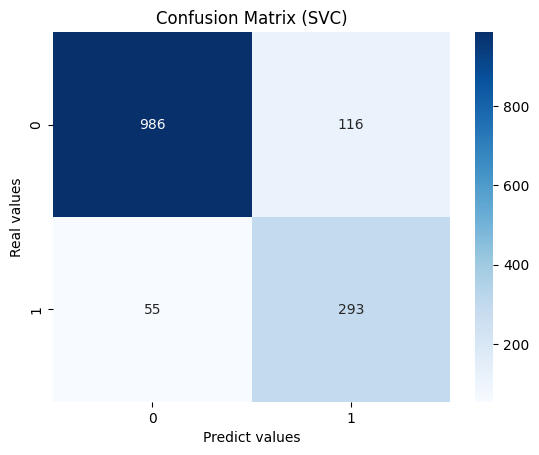

In [19]:
predictions = svc.predict(features_test)
import matplotlib.pyplot as plot
import seaborn as sns
confusion = confusion_matrix(labels_test, predictions)
sns.heatmap(confusion, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (SVC)")
plot.show()

In [20]:
train_score_c4 = svc.score(features_train, labels_train)
test_score_c4 = svc.score(features_test, labels_test)


print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.88
Classical SVC on the test dataset:     0.88


In [21]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1102
           1       0.72      0.84      0.77       348

    accuracy                           0.88      1450
   macro avg       0.83      0.87      0.85      1450
weighted avg       0.89      0.88      0.89      1450



In [22]:
num_obs_per_class = 100
selected_data = []

# Iterar sobre cada clase
for clase in data['class'].unique():
    # Seleccionar aleatoriamente 'num_obs_per_class' observaciones de cada clase
    selected_subset = data_envoltura[data_envoltura['class'] == clase].sample(n=num_obs_per_class, random_state=123)
    
    # Agregar el subconjunto seleccionado a la lista
    selected_data.append(selected_subset)

# Crear un nuevo DataFrame con las observaciones seleccionadas
selected_df = pd.concat(selected_data)

In [23]:
selected_df = selected_df.reset_index(drop=True)

In [24]:
selected_df

,transact,onServiceConnected,android.os.Binder,SEND_SMS,READ_PHONE_STATE,TelephonyManager.getDeviceId,class
0,0,0,0,0,0,0,1
1,1,1,1,0,1,1,1
2,0,0,0,1,0,0,1
3,0,0,0,0,1,1,1
4,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...
195,1,1,1,0,1,0,0
196,0,1,0,0,0,0,0
197,1,1,1,0,1,1,0
198,0,0,1,0,1,0,0


In [25]:
labels = selected_df['class']
features = selected_df.drop(columns='class')

In [26]:
from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(selected_df, test_size=0.2, random_state=123)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=123)

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()
_ = svc.fit(features_train, labels_train) 

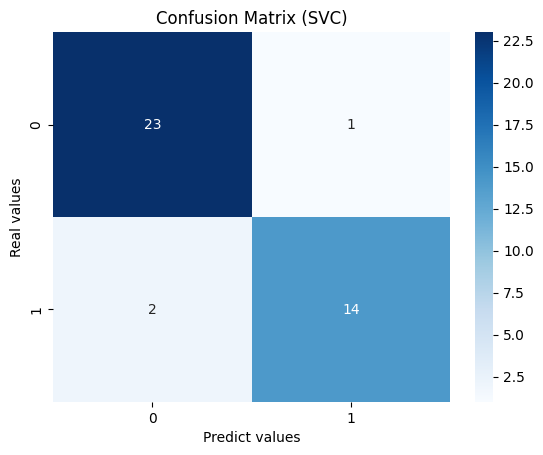

In [28]:
predictions = svc.predict(features_test)
import matplotlib.pyplot as plot
confusion = confusion_matrix(labels_test, predictions)
sns.heatmap(confusion, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (SVC)")
plot.show()

In [29]:
train_score_c4 = svc.score(features_train, labels_train)
test_score_c4 = svc.score(features_test, labels_test)


print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.86
Classical SVC on the test dataset:     0.93


VQC

In [30]:
features.shape

(200, 6)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


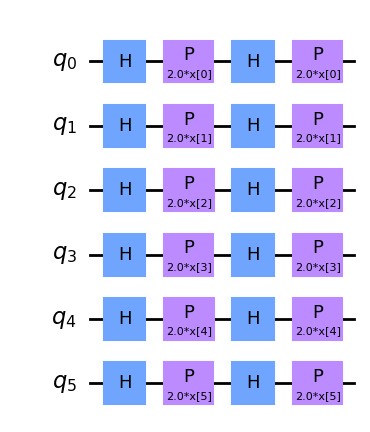

In [31]:
from qiskit.circuit.library import ZFeatureMap
import matplotlib.pyplot as plt
num_features = features.shape[1]
feature_map = ZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", fold=20)

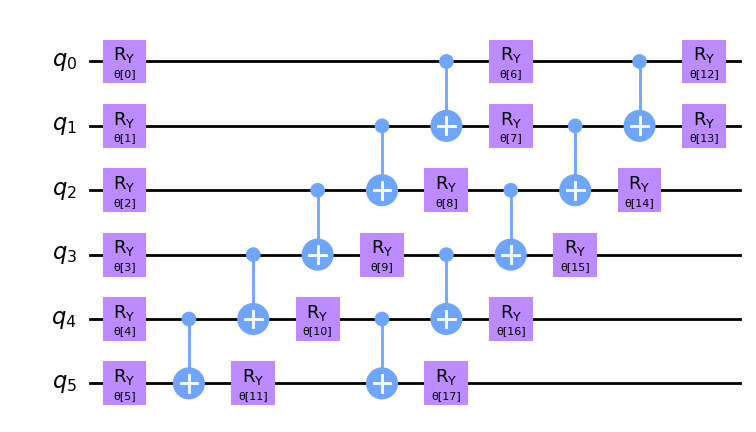

In [32]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

## SLSQP

In [33]:
from qiskit.algorithms.optimizers import SLSQP
optimizer = SLSQP(maxiter=25)

C:\Users\estre\AppData\Local\Temp\ipykernel_11480\657383429.py:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed in Qiskit 1.0. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import SLSQP


In [34]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [35]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [36]:
!pip install qiskit-machine-learning

In [37]:
features_train

,transact,onServiceConnected,android.os.Binder,SEND_SMS,READ_PHONE_STATE,TelephonyManager.getDeviceId
24,0,0,0,0,1,1
150,1,1,1,0,1,0
114,0,0,0,0,0,0
33,0,0,0,0,1,0
23,0,0,0,1,1,1
...,...,...,...,...,...,...
17,0,0,0,0,0,0
98,0,0,0,0,1,1
66,0,0,0,0,1,1
126,1,1,1,0,1,1


In [38]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

In [111]:
y_train_np

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0], dtype=int64)

In [39]:
print("Shape of X_train_np:", X_train_np.shape)
print("Shape of y_train_np:", y_train_np.shape)

Shape of X_train_np: (160, 6)
Shape of y_train_np: (160,)


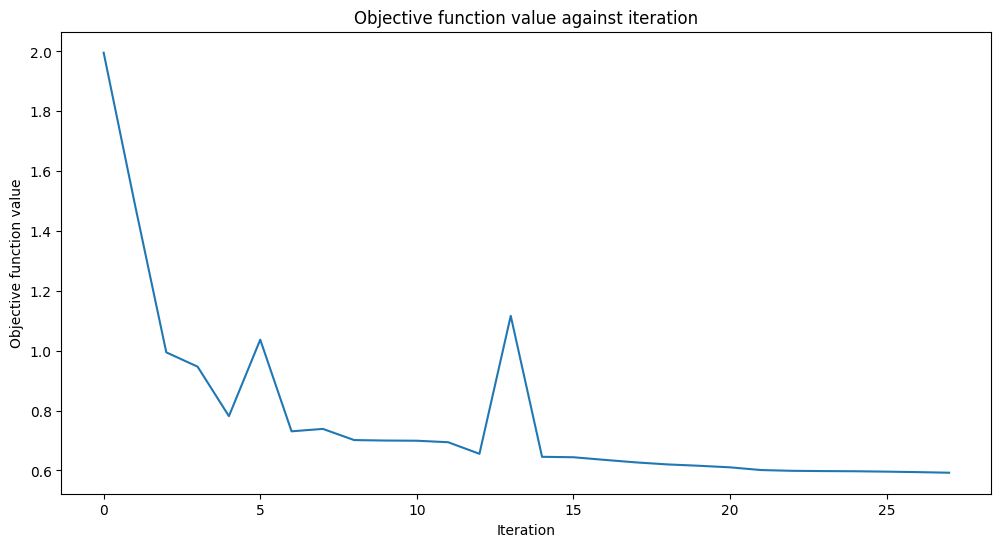

Training time: 1088 seconds


In [40]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [41]:
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

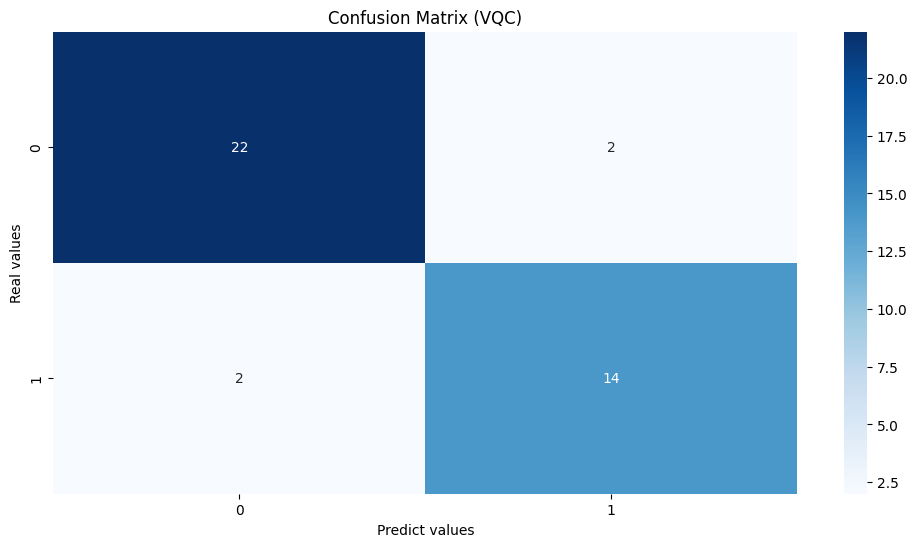

In [42]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [43]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.83
Quantum VQC on the test dataset:     0.90


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.916667  0.916667  0.916667        24
           1   0.875000  0.875000  0.875000        16

    accuracy                       0.900000        40
   macro avg   0.895833  0.895833  0.895833        40
weighted avg   0.900000  0.900000  0.900000        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


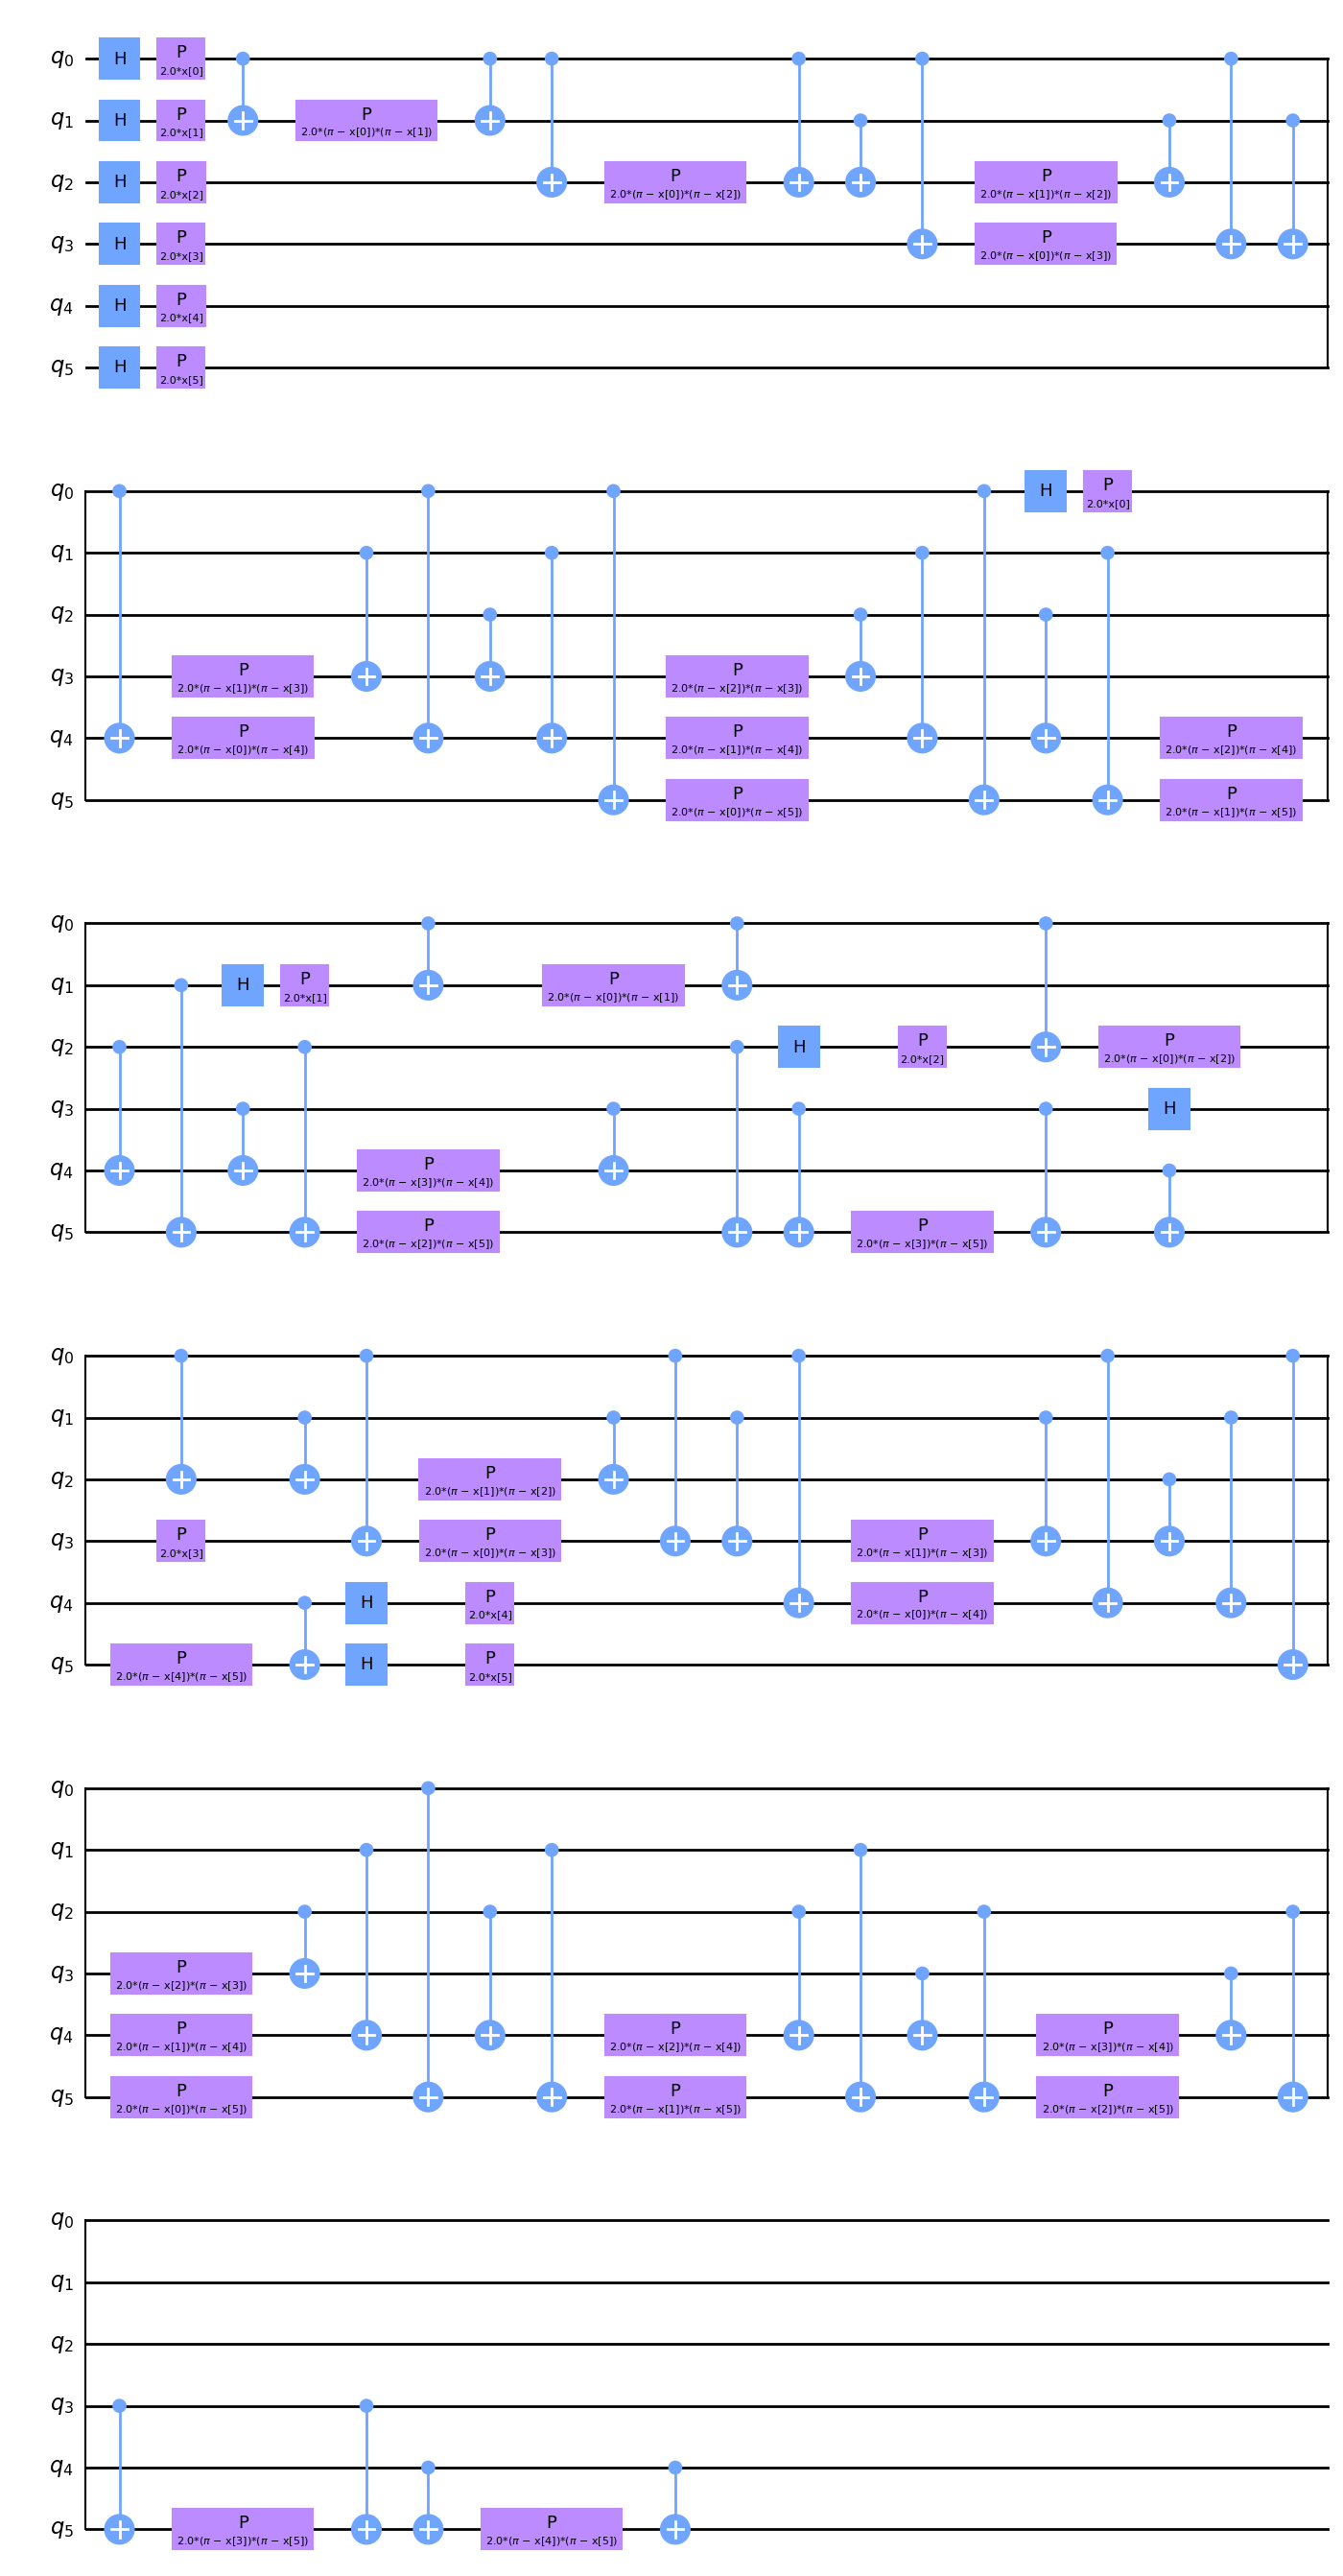

In [45]:
from qiskit.circuit.library import ZZFeatureMap
import matplotlib.pyplot as plt
num_features = features.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", fold=20)

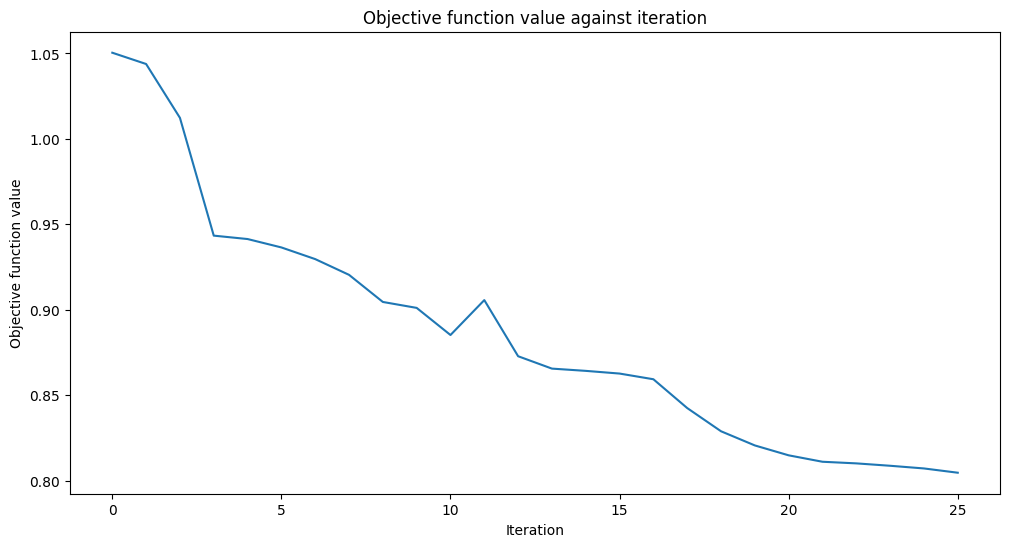

Training time: 3212 seconds


In [46]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

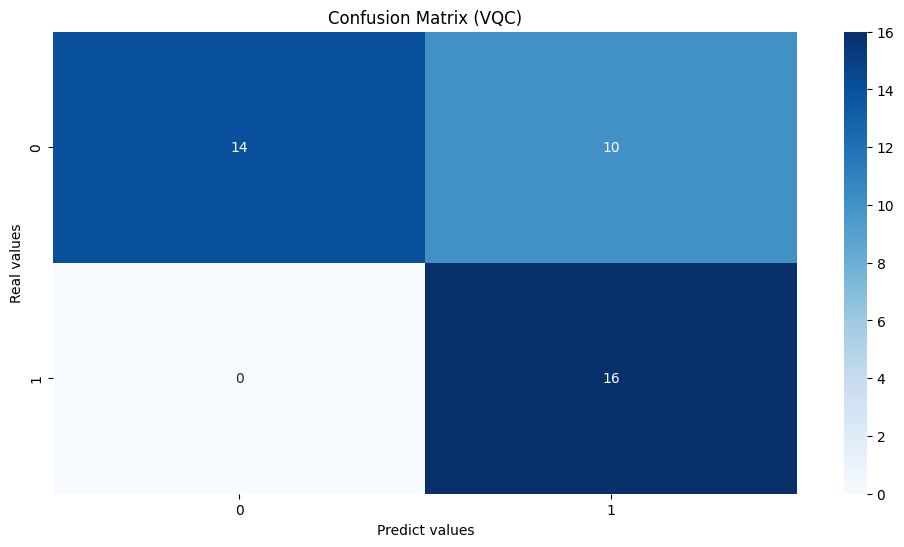

In [47]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [48]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.77
Quantum VQC on the test dataset:     0.75


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.583333  0.736842        24
           1   0.615385  1.000000  0.761905        16

    accuracy                       0.750000        40
   macro avg   0.807692  0.791667  0.749373        40
weighted avg   0.846154  0.750000  0.746867        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


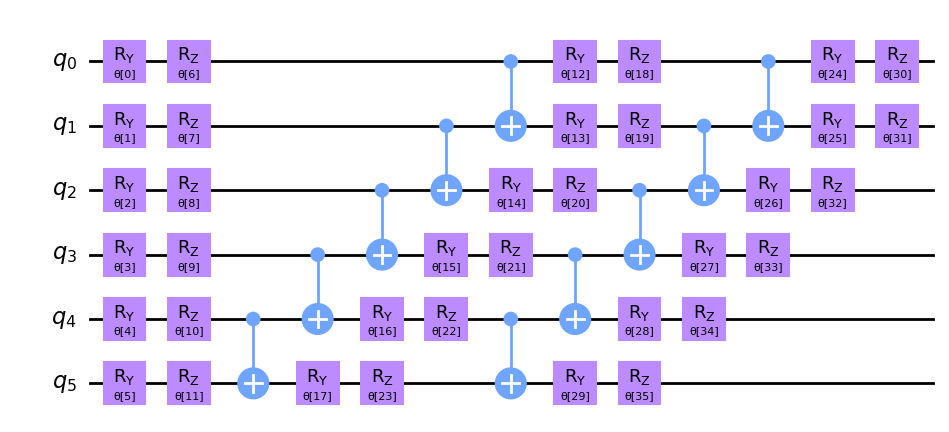

In [50]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

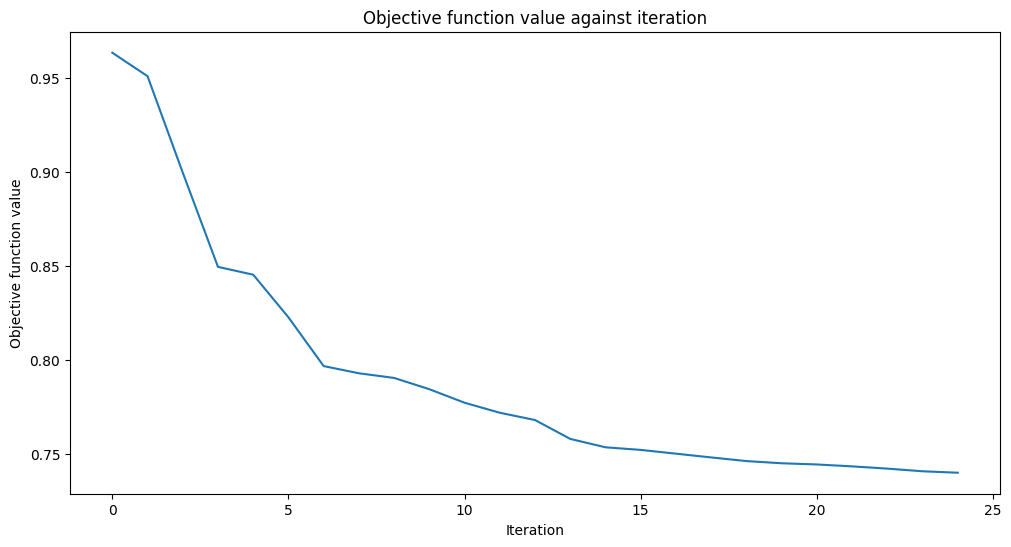

Training time: 7413 seconds


In [51]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

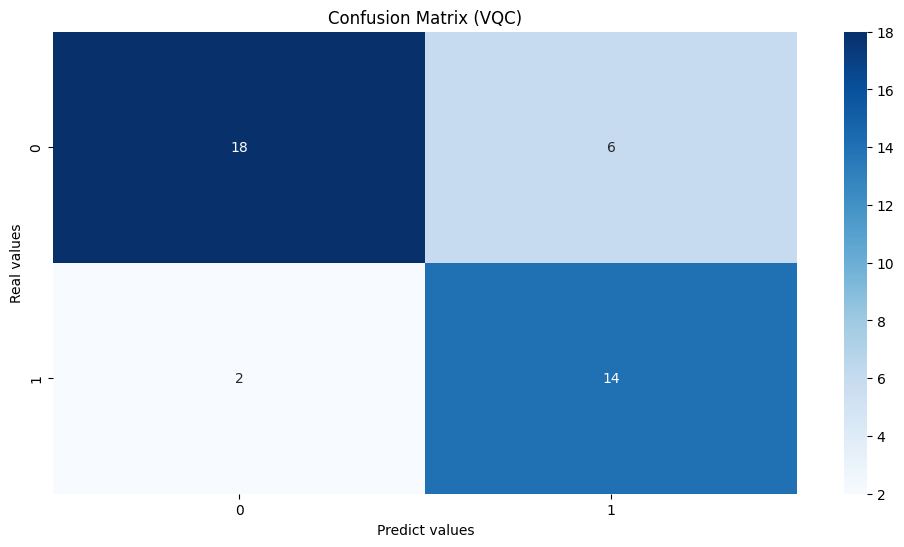

In [52]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [53]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.78
Quantum VQC on the test dataset:     0.80


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.900000  0.750000  0.818182        24
           1   0.700000  0.875000  0.777778        16

    accuracy                       0.800000        40
   macro avg   0.800000  0.812500  0.797980        40
weighted avg   0.820000  0.800000  0.802020        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


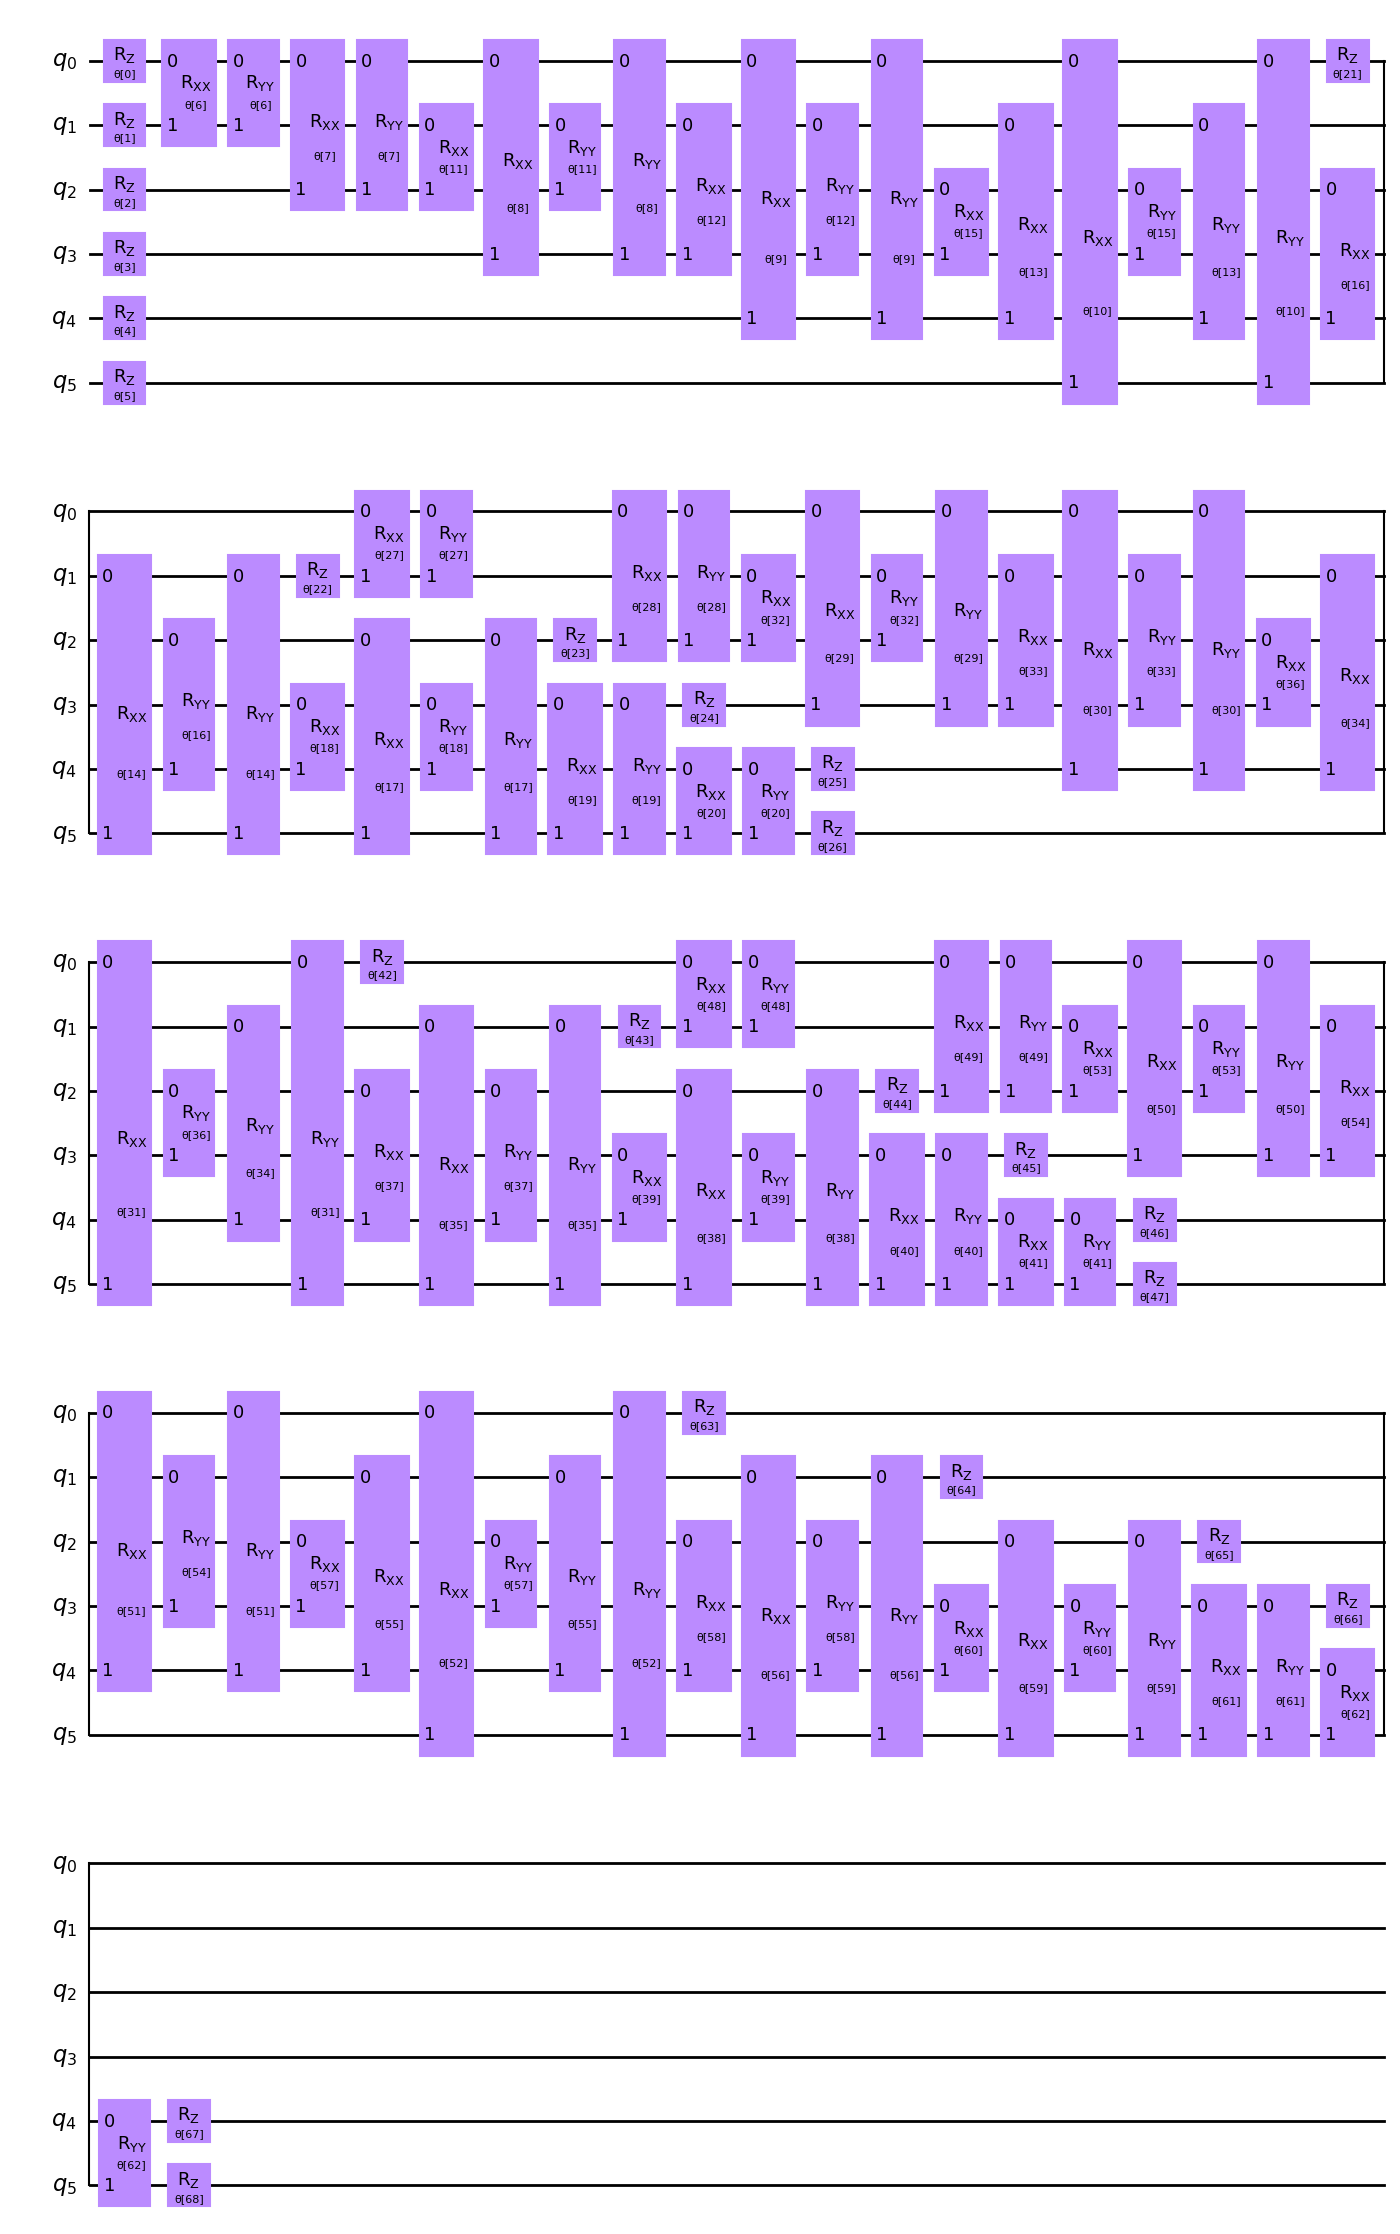

In [55]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

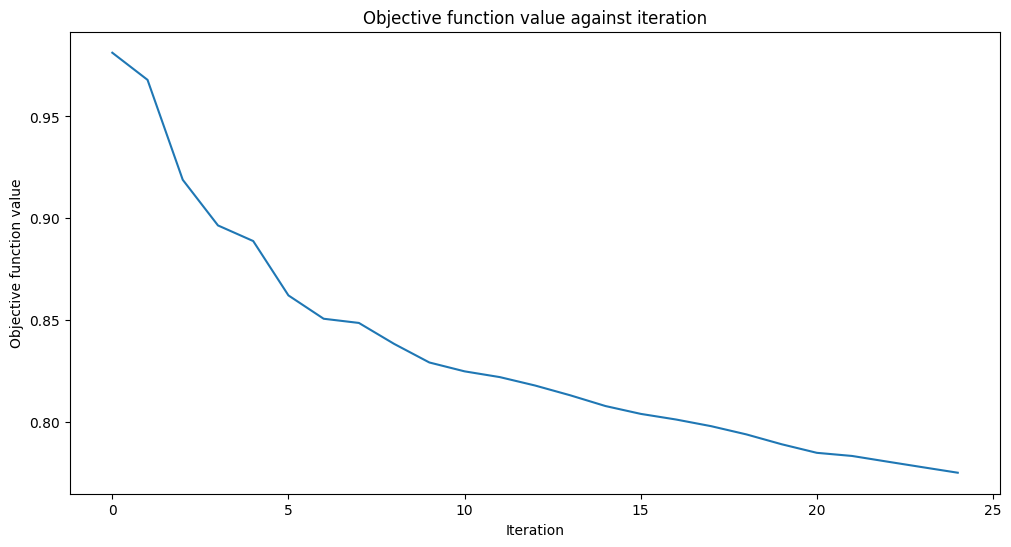

Training time: 28733 seconds


In [56]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

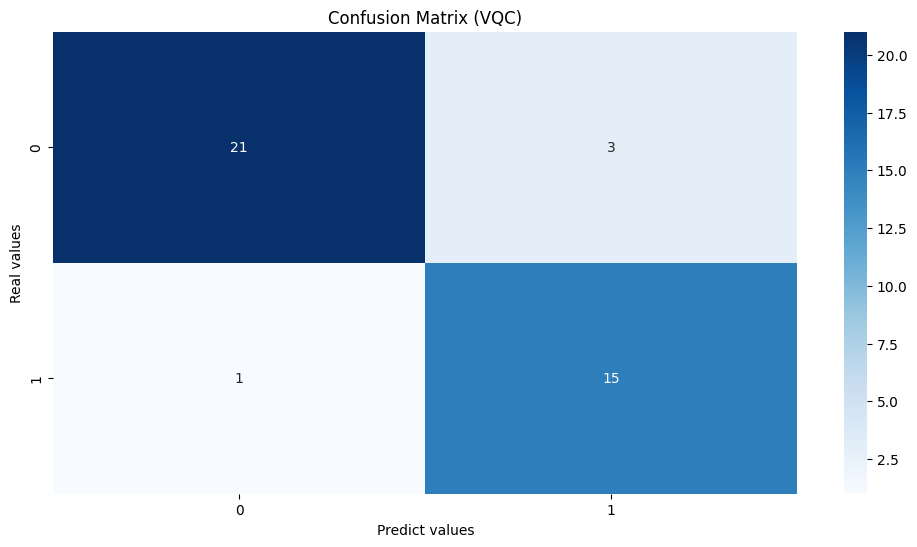

In [57]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [58]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.81
Quantum VQC on the test dataset:     0.90


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions,digits=6))

              precision    recall  f1-score   support

           0   0.954545  0.875000  0.913043        24
           1   0.833333  0.937500  0.882353        16

    accuracy                       0.900000        40
   macro avg   0.893939  0.906250  0.897698        40
weighted avg   0.906061  0.900000  0.900767        40



## COBYLA

In [60]:
from qiskit.algorithms.optimizers import COBYLA
optimizer = COBYLA(maxiter=100)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


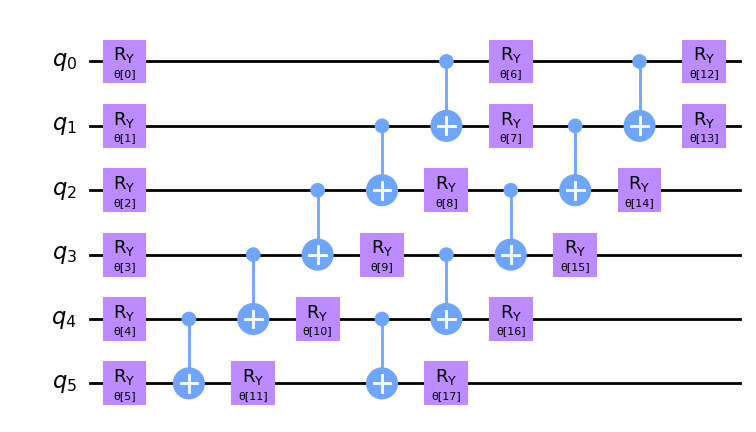

In [61]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

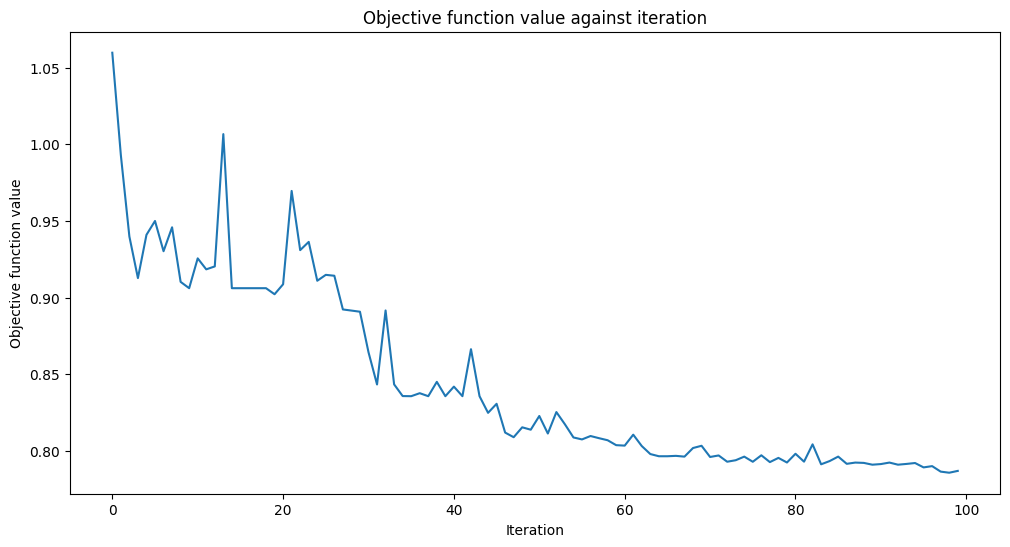

Training time: 172 seconds


In [62]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

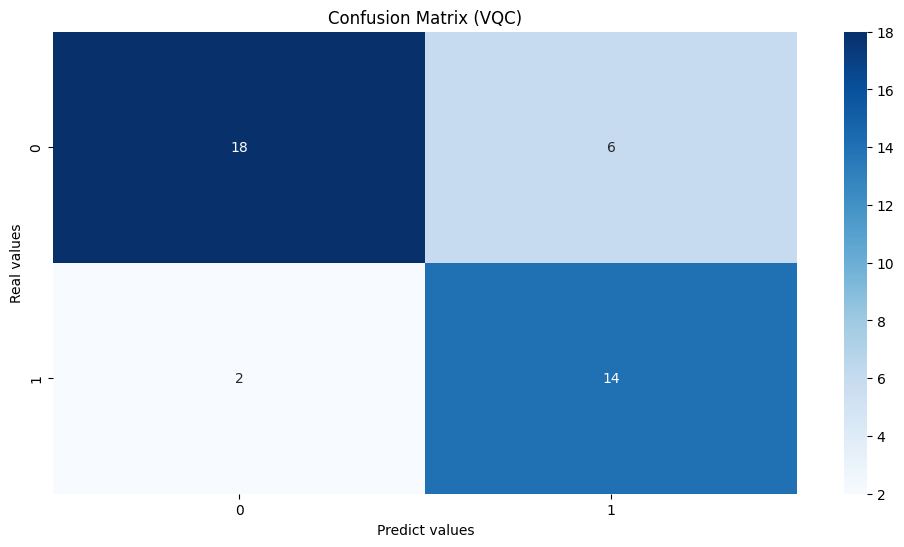

In [63]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [64]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.80
Quantum VQC on the test dataset:     0.80


In [65]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.900000  0.750000  0.818182        24
           1   0.700000  0.875000  0.777778        16

    accuracy                       0.800000        40
   macro avg   0.800000  0.812500  0.797980        40
weighted avg   0.820000  0.800000  0.802020        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


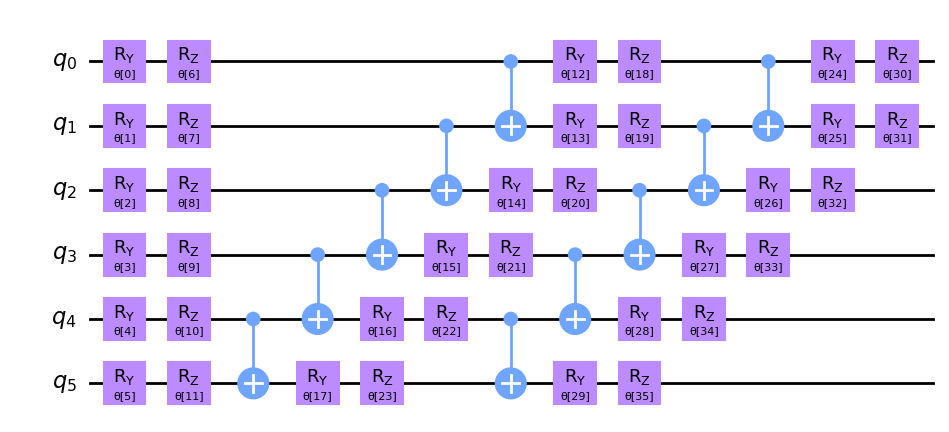

In [66]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

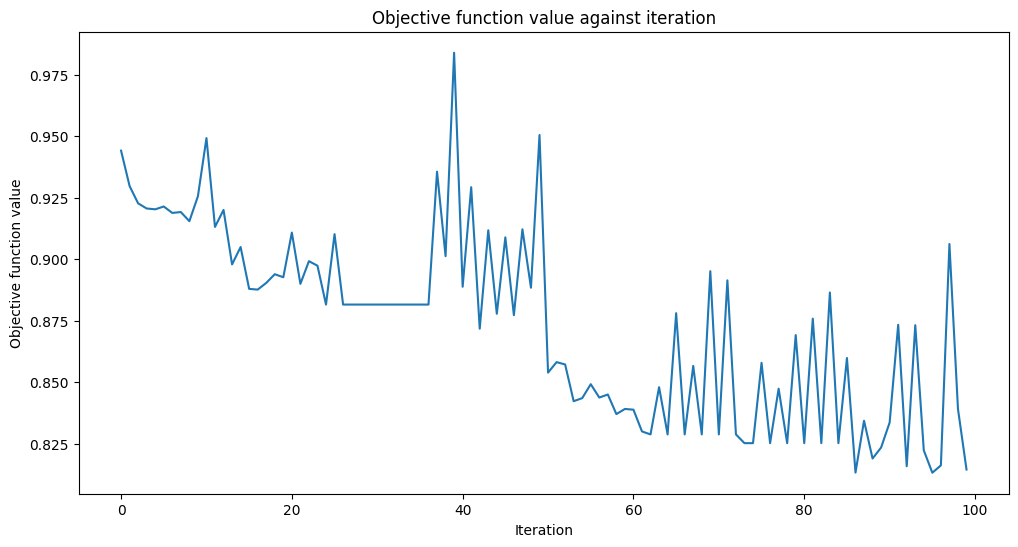

Training time: 220 seconds


In [67]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start


print(f"Training time: {round(elapsed)} seconds")

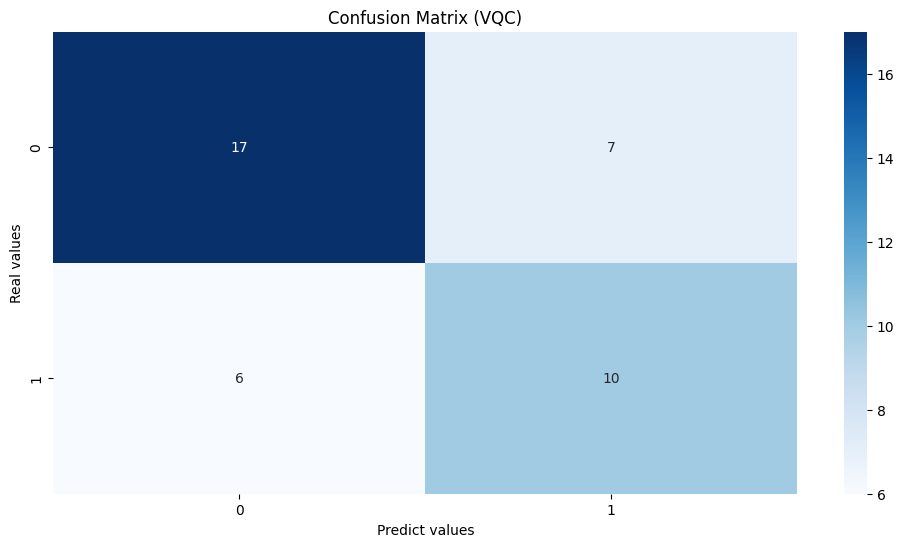

In [68]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [69]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.70
Quantum VQC on the test dataset:     0.68


In [70]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.739130  0.708333  0.723404        24
           1   0.588235  0.625000  0.606061        16

    accuracy                       0.675000        40
   macro avg   0.663683  0.666667  0.664732        40
weighted avg   0.678772  0.675000  0.676467        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


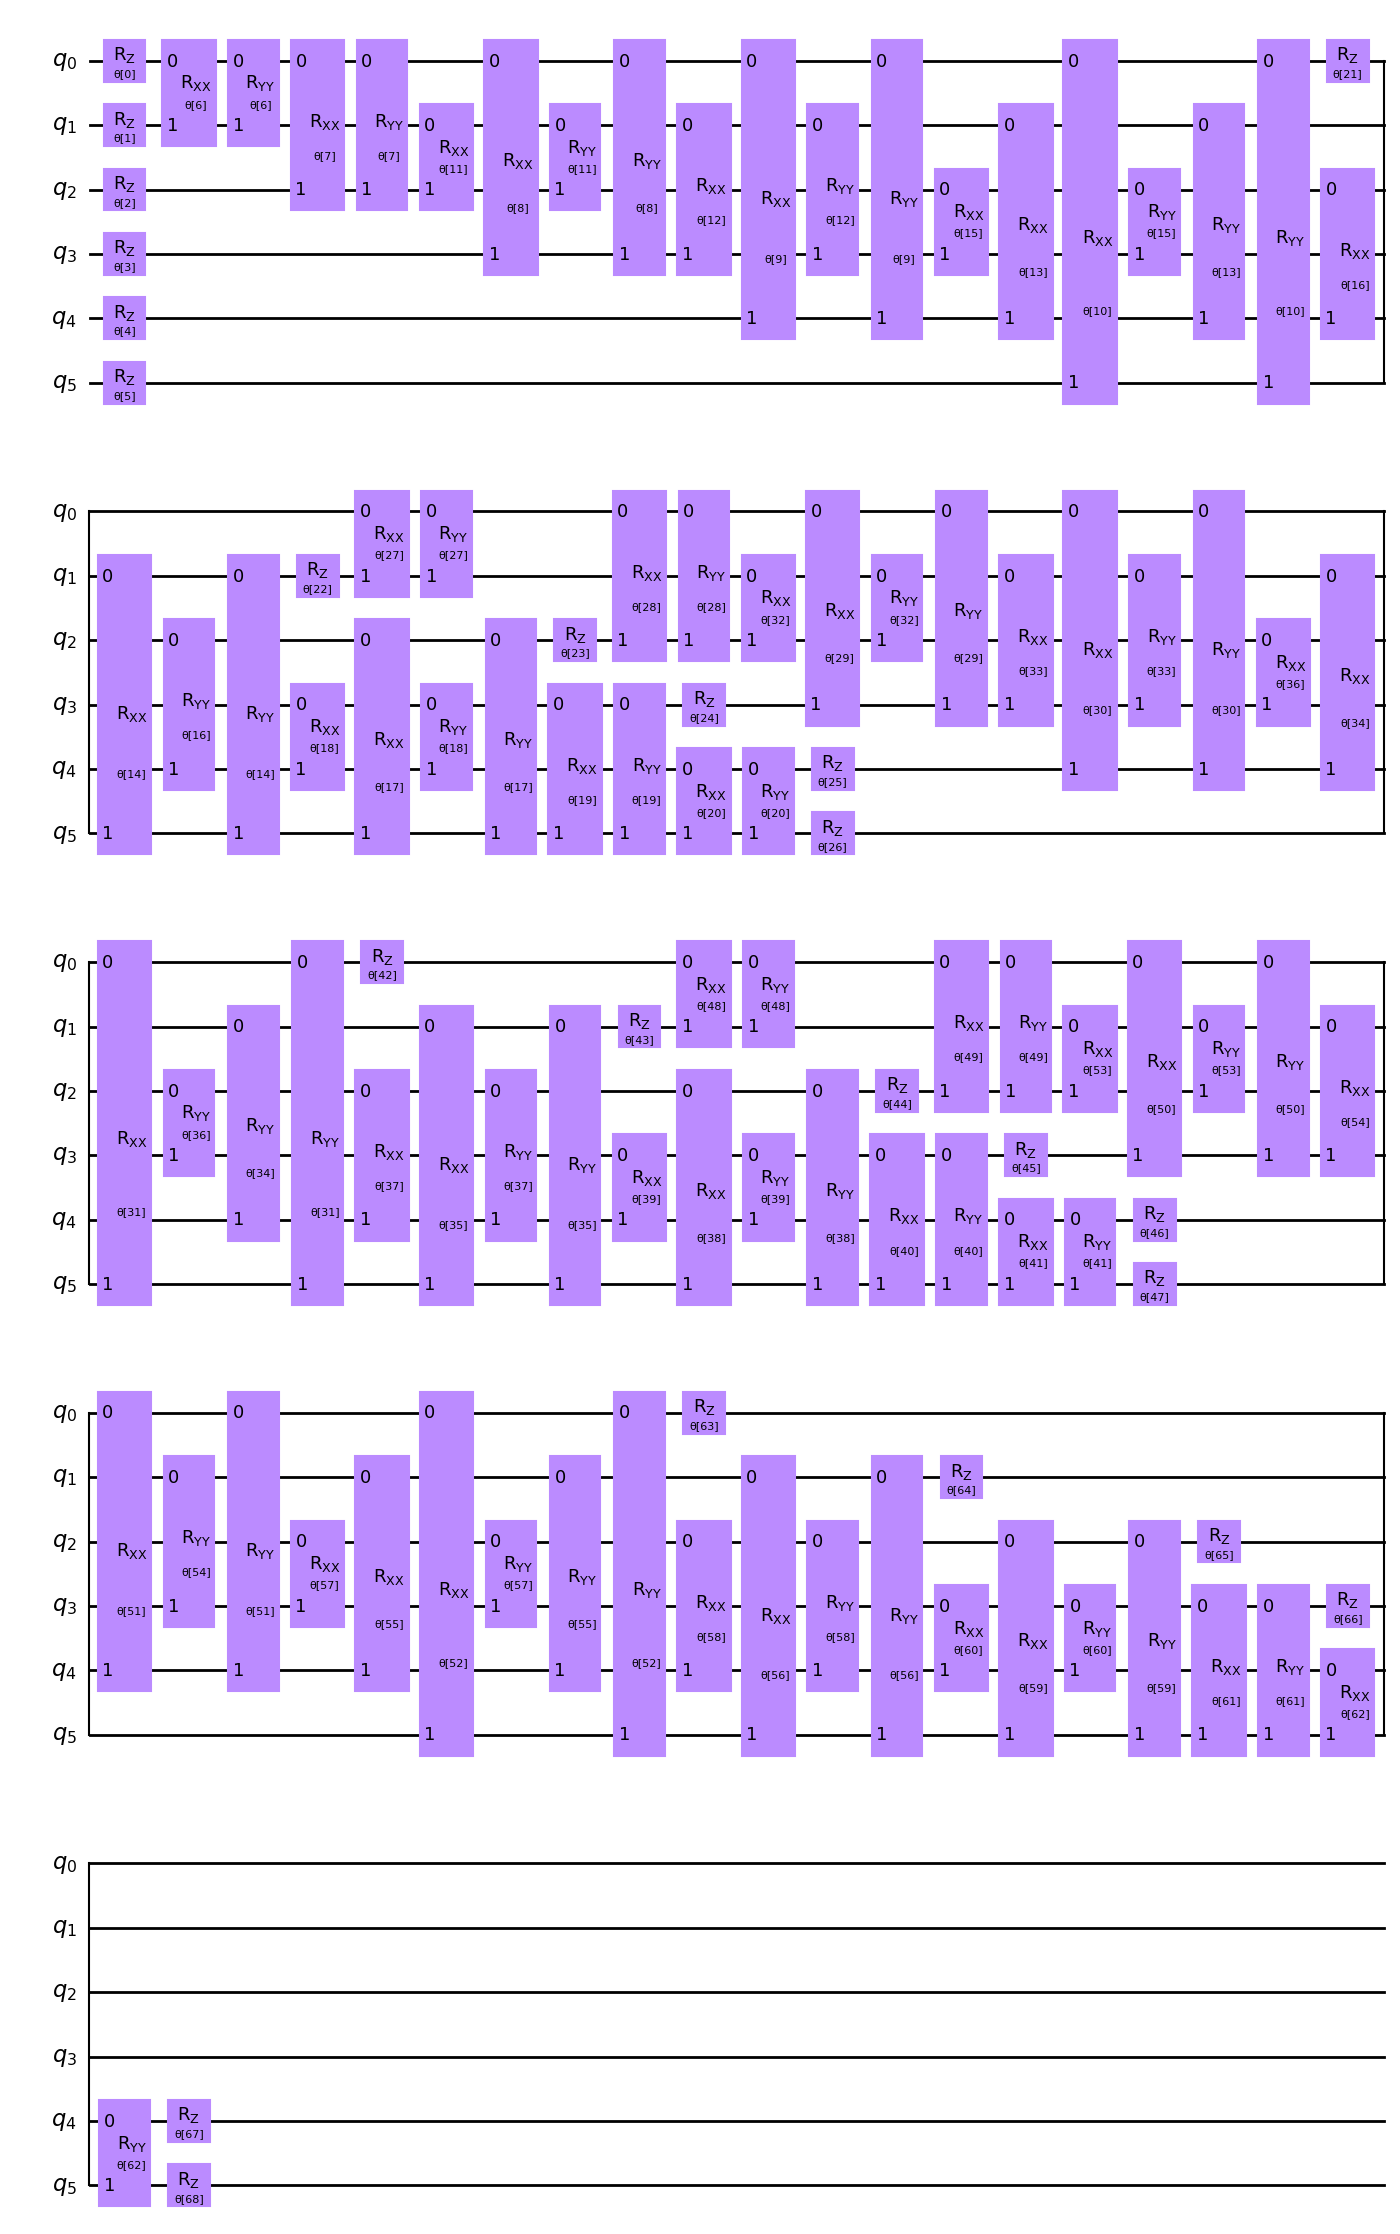

In [71]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

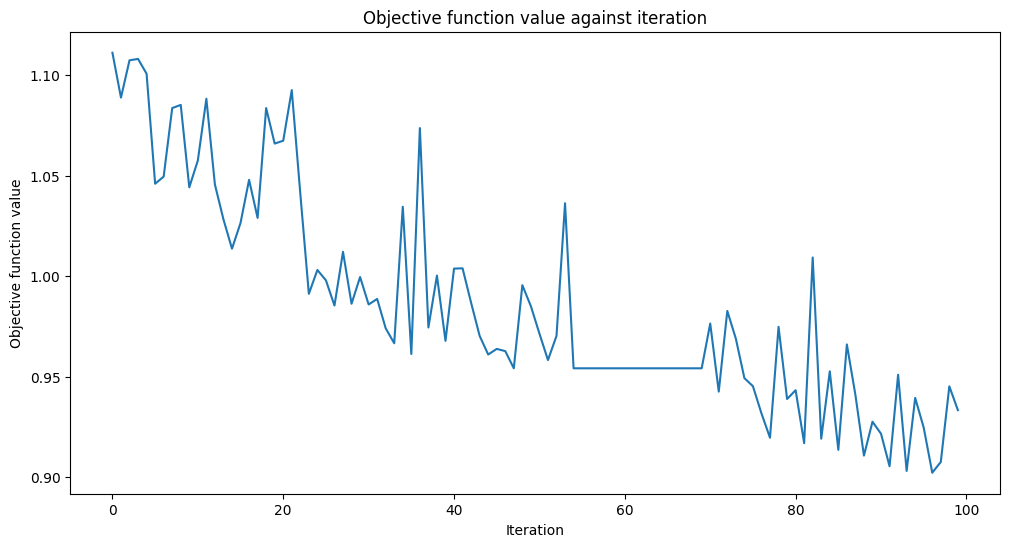

Training time: 363 seconds


In [72]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

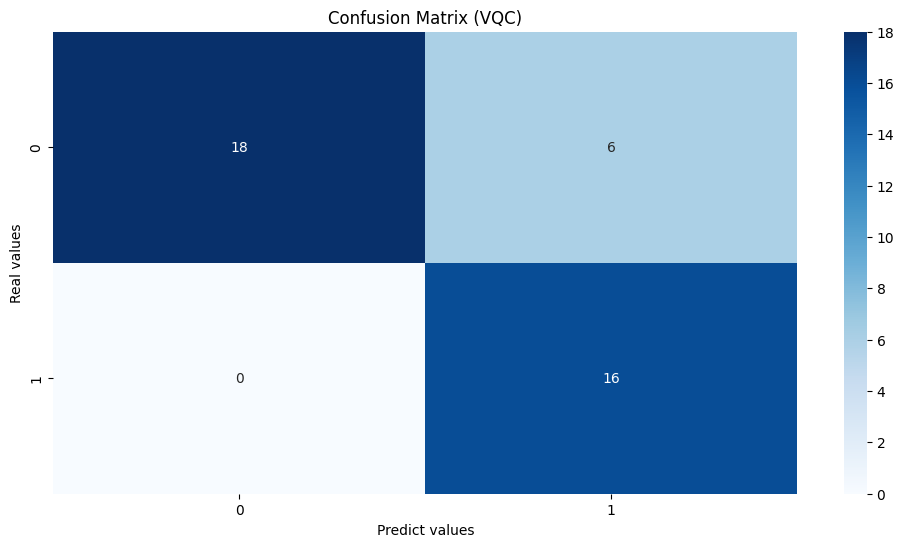

In [73]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [74]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.81
Quantum VQC on the test dataset:     0.85


In [75]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.750000  0.857143        24
           1   0.727273  1.000000  0.842105        16

    accuracy                       0.850000        40
   macro avg   0.863636  0.875000  0.849624        40
weighted avg   0.890909  0.850000  0.851128        40



## Gradiant Descents

In [76]:
from qiskit.algorithms.optimizers import GradientDescent
optimizer = GradientDescent(maxiter=25)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


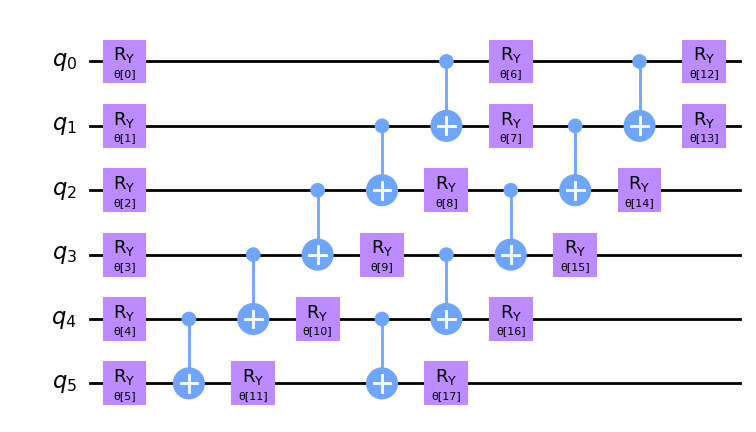

In [77]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

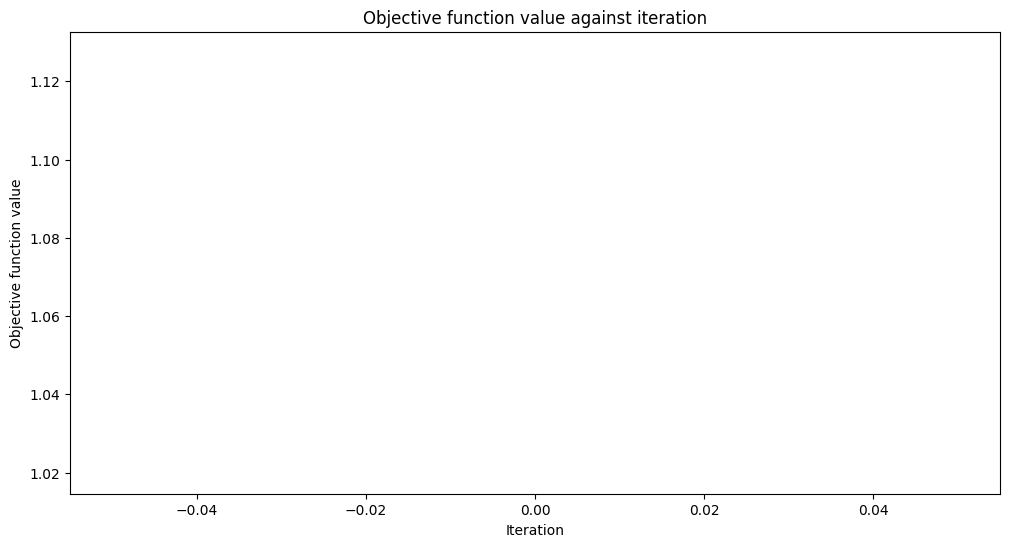

Training time: 1377 seconds


In [78]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

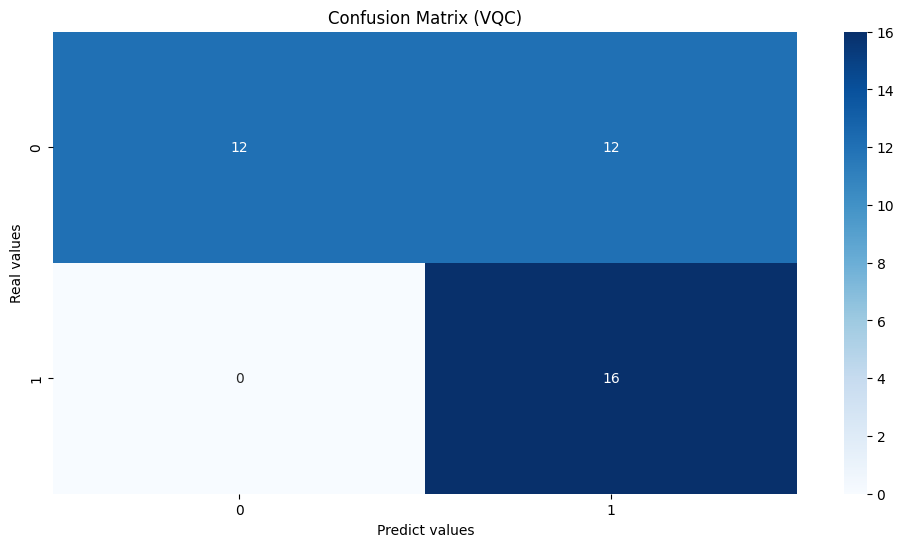

In [79]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [80]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.66
Quantum VQC on the test dataset:     0.70


In [81]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.500000  0.666667        24
           1   0.571429  1.000000  0.727273        16

    accuracy                       0.700000        40
   macro avg   0.785714  0.750000  0.696970        40
weighted avg   0.828571  0.700000  0.690909        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


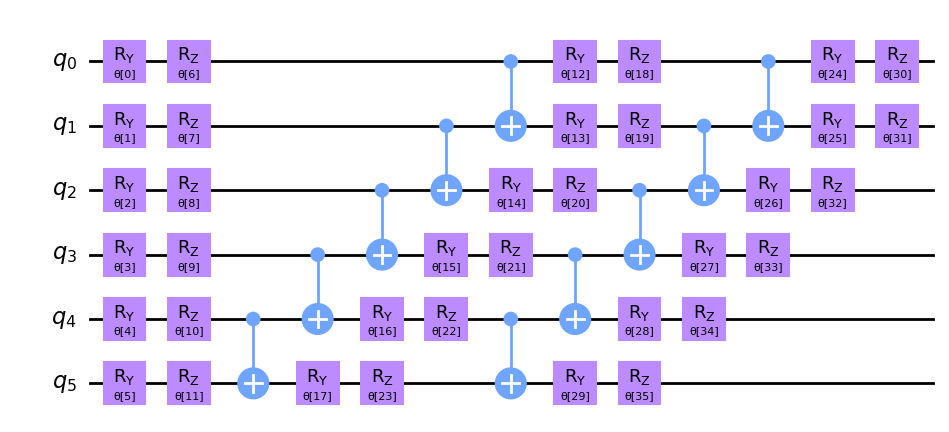

In [82]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

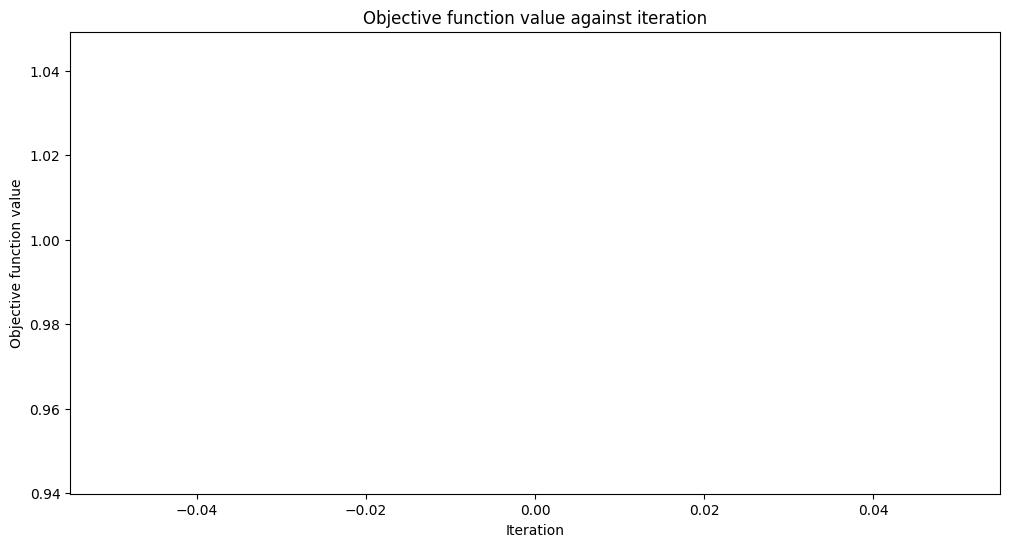

Training time: 4729 seconds


In [83]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

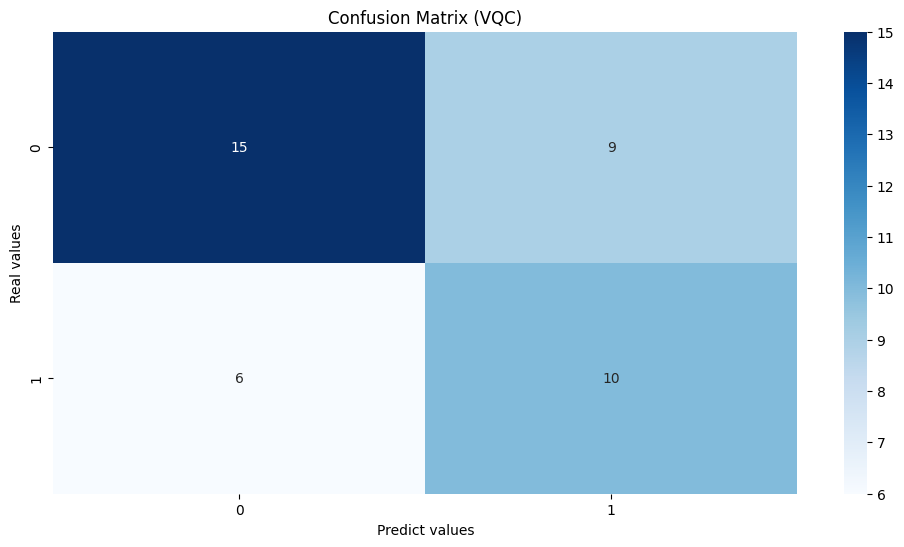

In [84]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [85]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.64
Quantum VQC on the test dataset:     0.62


In [86]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.714286  0.625000  0.666667        24
           1   0.526316  0.625000  0.571429        16

    accuracy                       0.625000        40
   macro avg   0.620301  0.625000  0.619048        40
weighted avg   0.639098  0.625000  0.628571        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


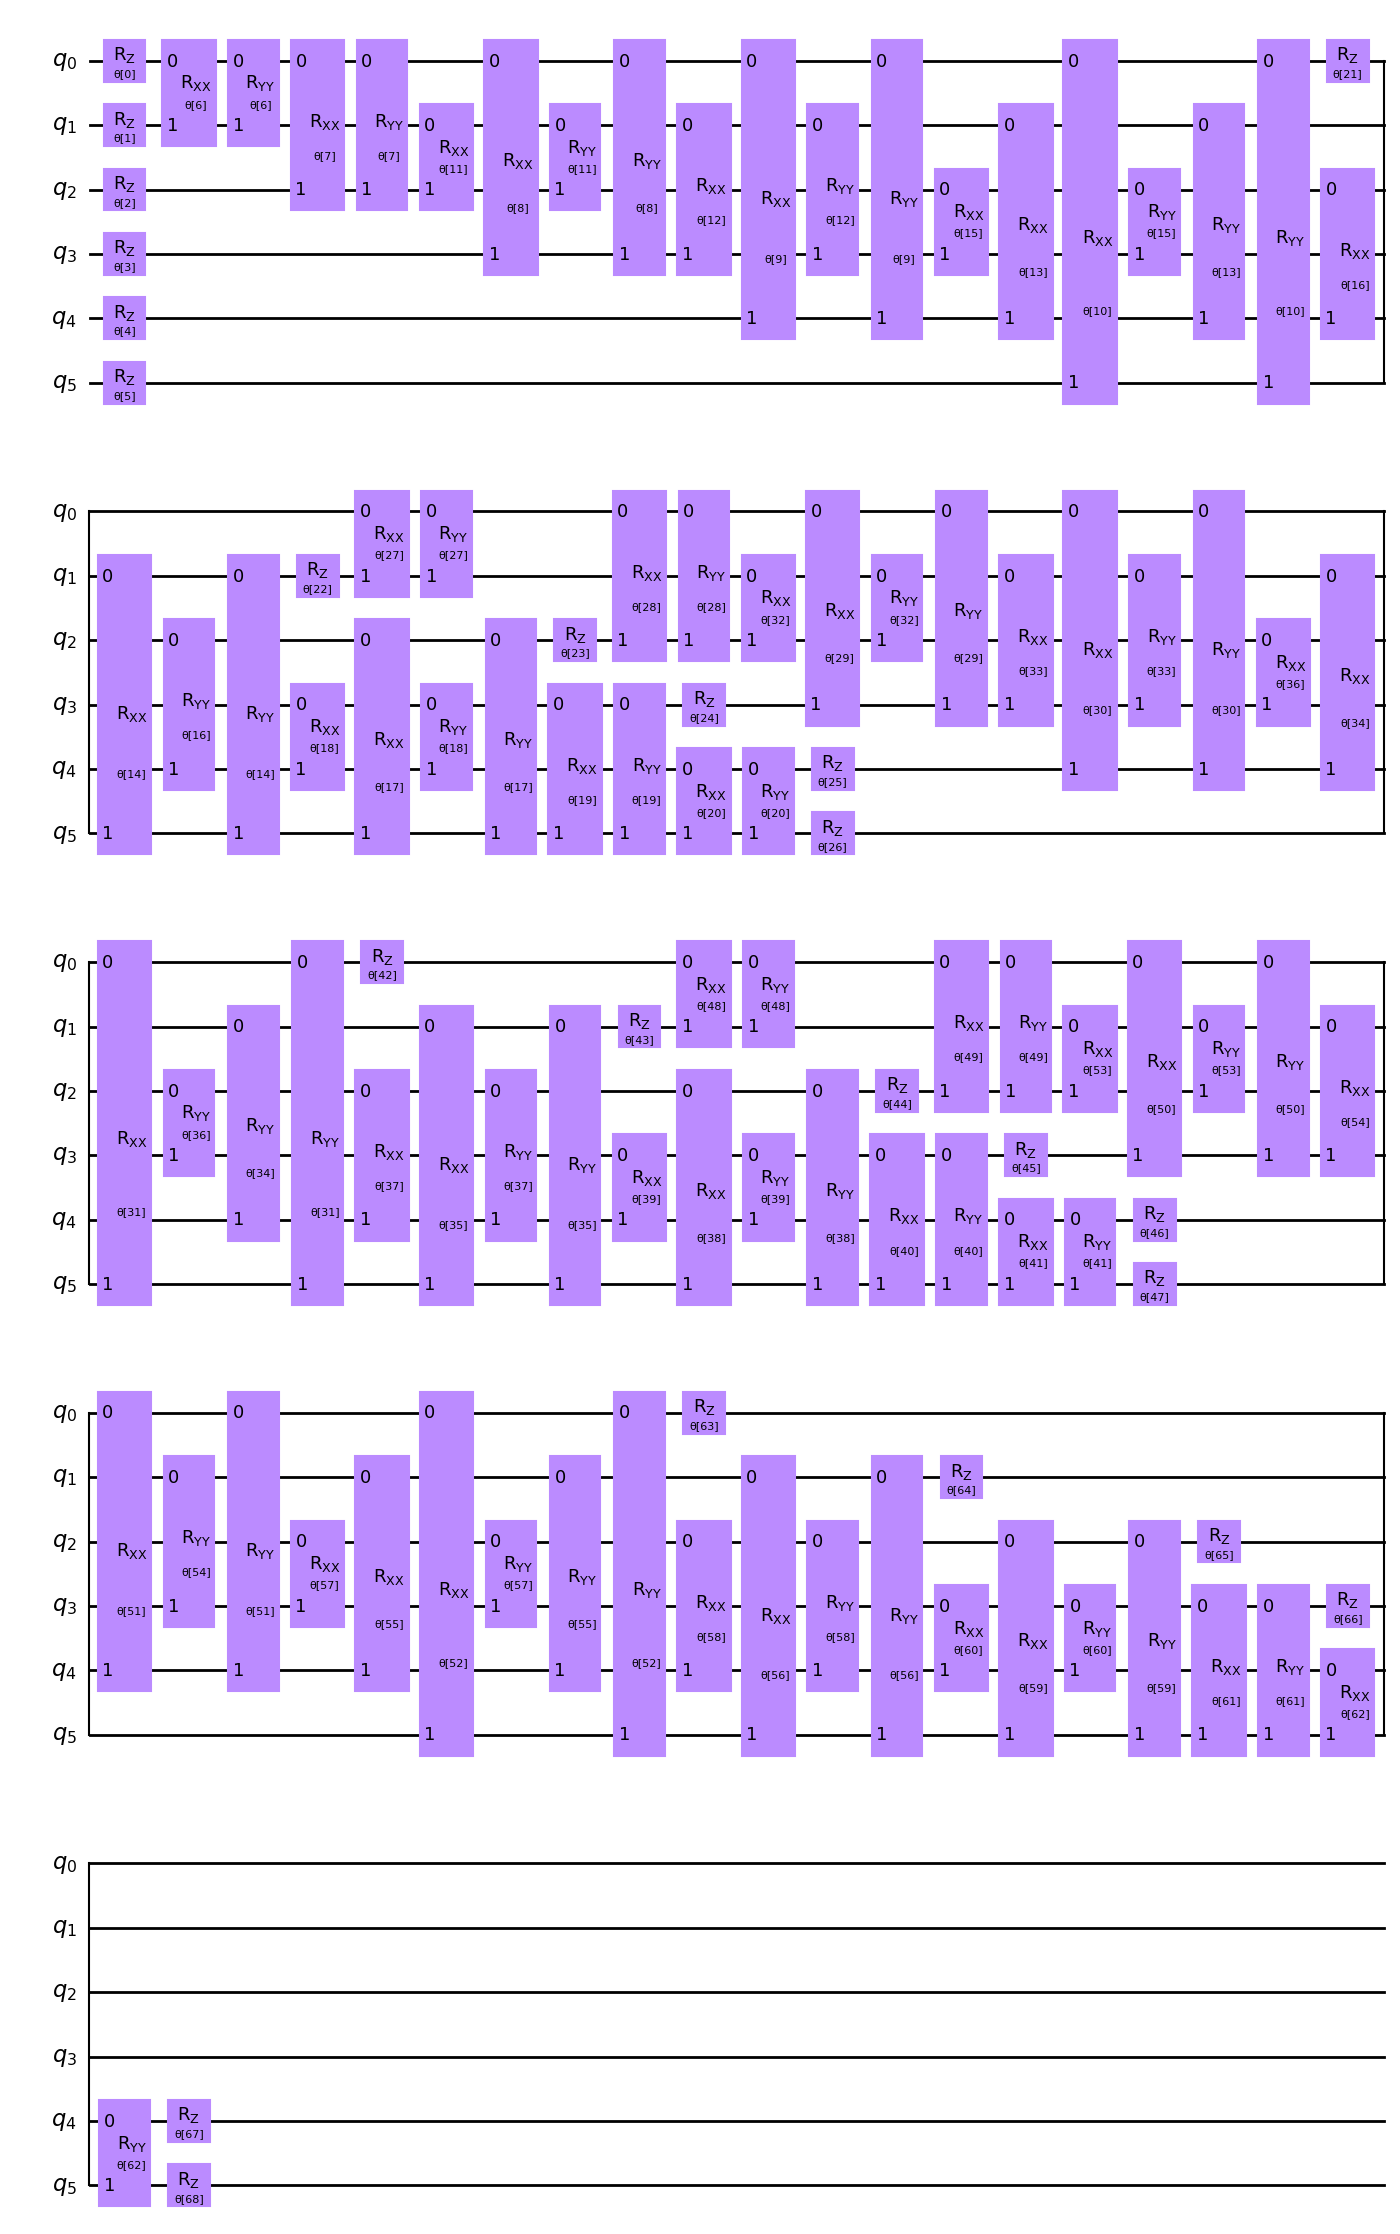

In [87]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

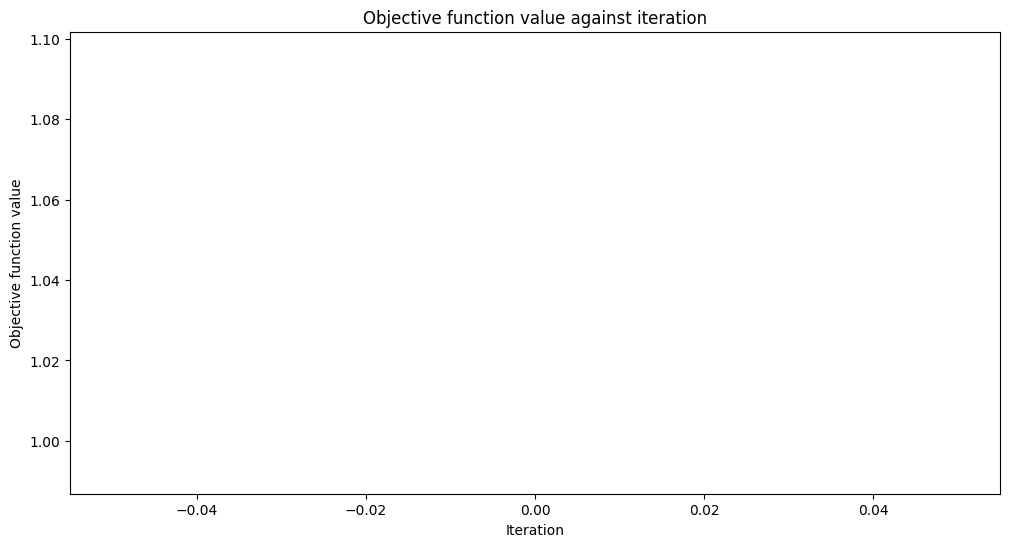

Training time: 27567 seconds


In [88]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

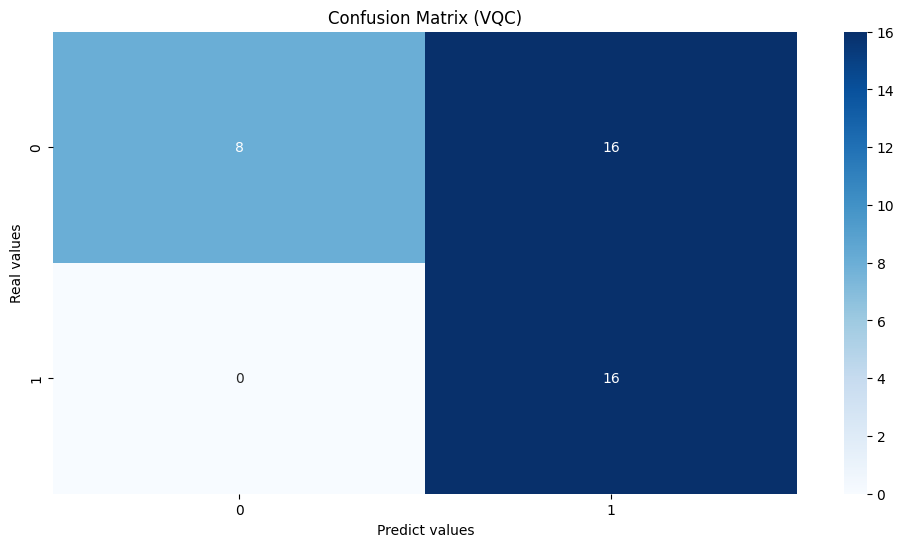

In [89]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [90]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.58
Quantum VQC on the test dataset:     0.60


In [91]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   1.000000  0.333333  0.500000        24
           1   0.500000  1.000000  0.666667        16

    accuracy                       0.600000        40
   macro avg   0.750000  0.666667  0.583333        40
weighted avg   0.800000  0.600000  0.566667        40



## SPSA

In [92]:
from qiskit.algorithms.optimizers import SPSA
optimizer = SPSA(maxiter=100)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


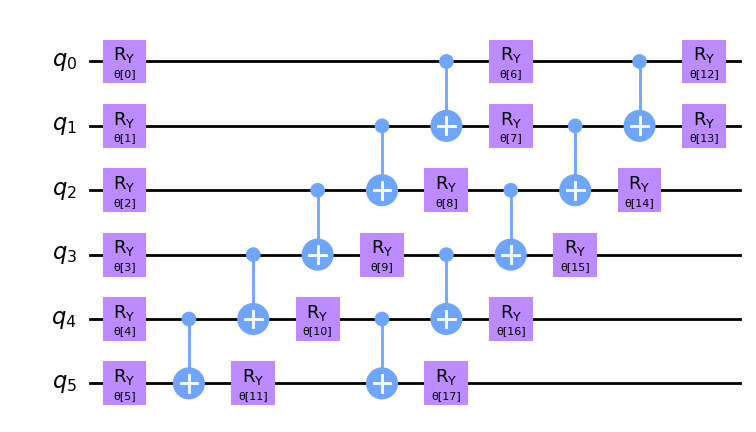

In [93]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

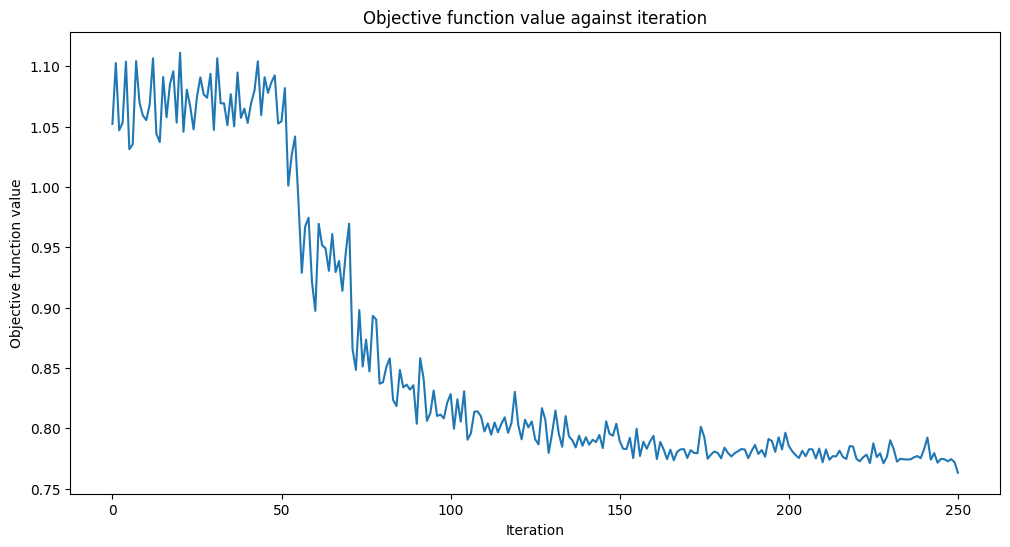

Training time: 472 seconds


In [94]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

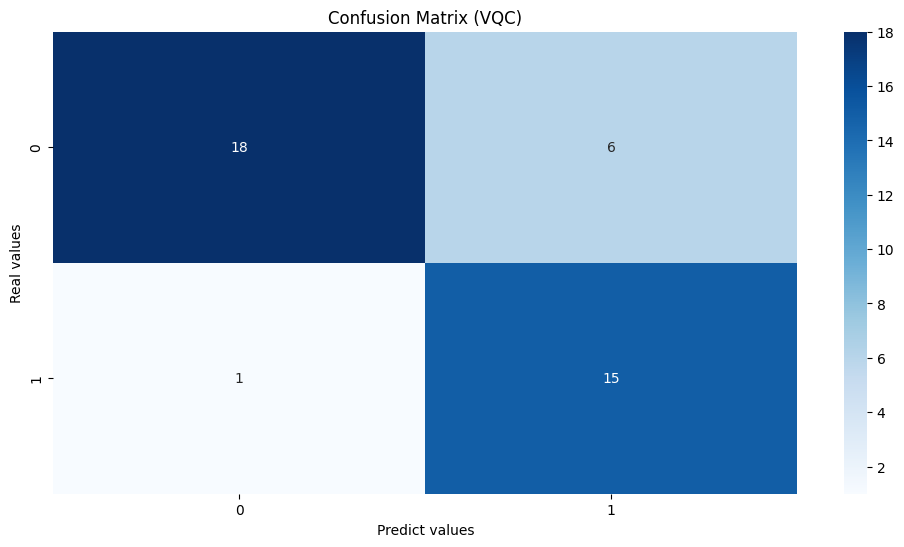

In [95]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [96]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.79
Quantum VQC on the test dataset:     0.82


In [97]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.947368  0.750000  0.837209        24
           1   0.714286  0.937500  0.810811        16

    accuracy                       0.825000        40
   macro avg   0.830827  0.843750  0.824010        40
weighted avg   0.854135  0.825000  0.826650        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


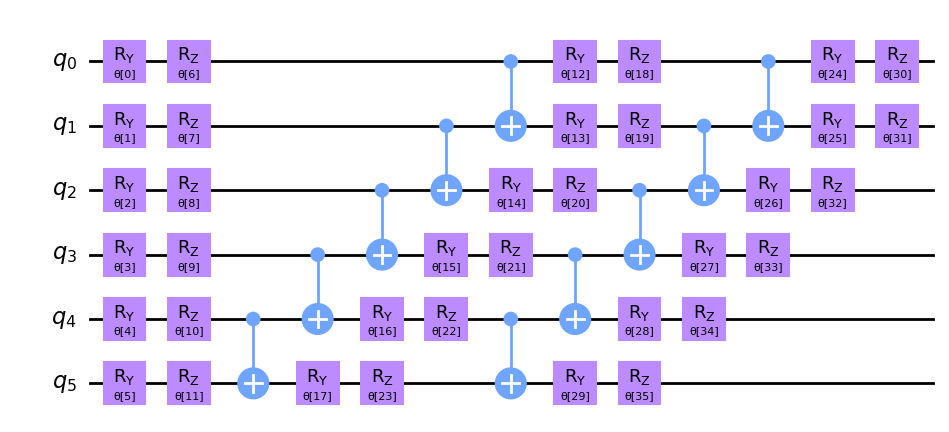

In [98]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

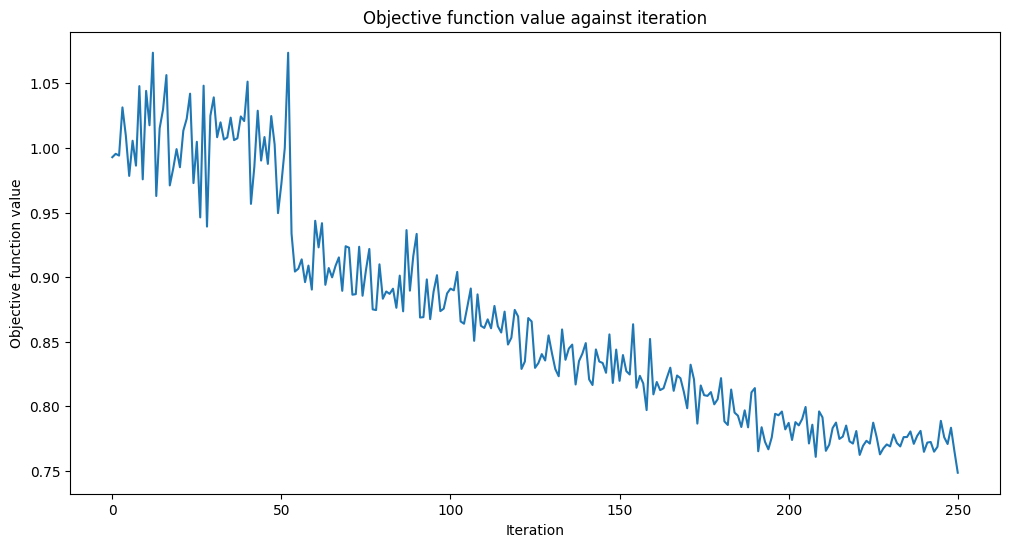

Training time: 611 seconds


In [99]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

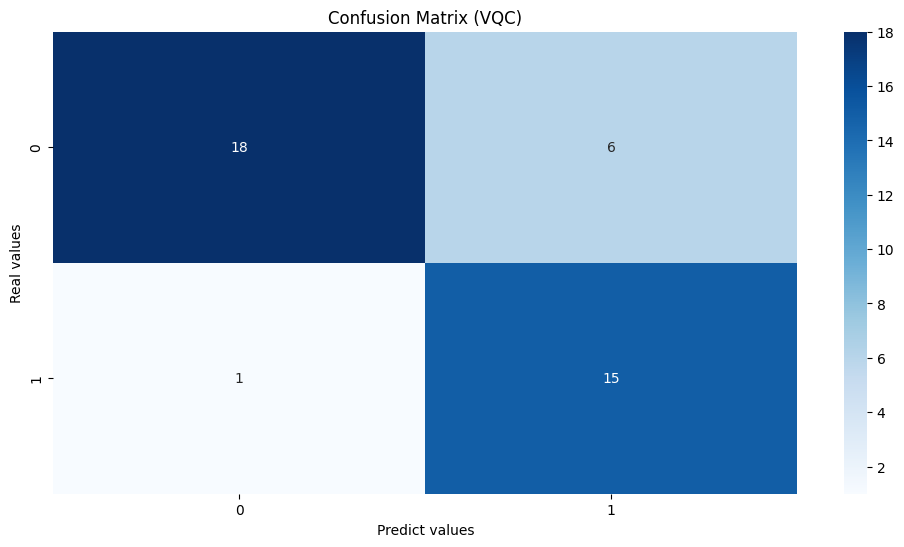

In [100]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [101]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.78
Quantum VQC on the test dataset:     0.82


In [102]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.947368  0.750000  0.837209        24
           1   0.714286  0.937500  0.810811        16

    accuracy                       0.825000        40
   macro avg   0.830827  0.843750  0.824010        40
weighted avg   0.854135  0.825000  0.826650        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


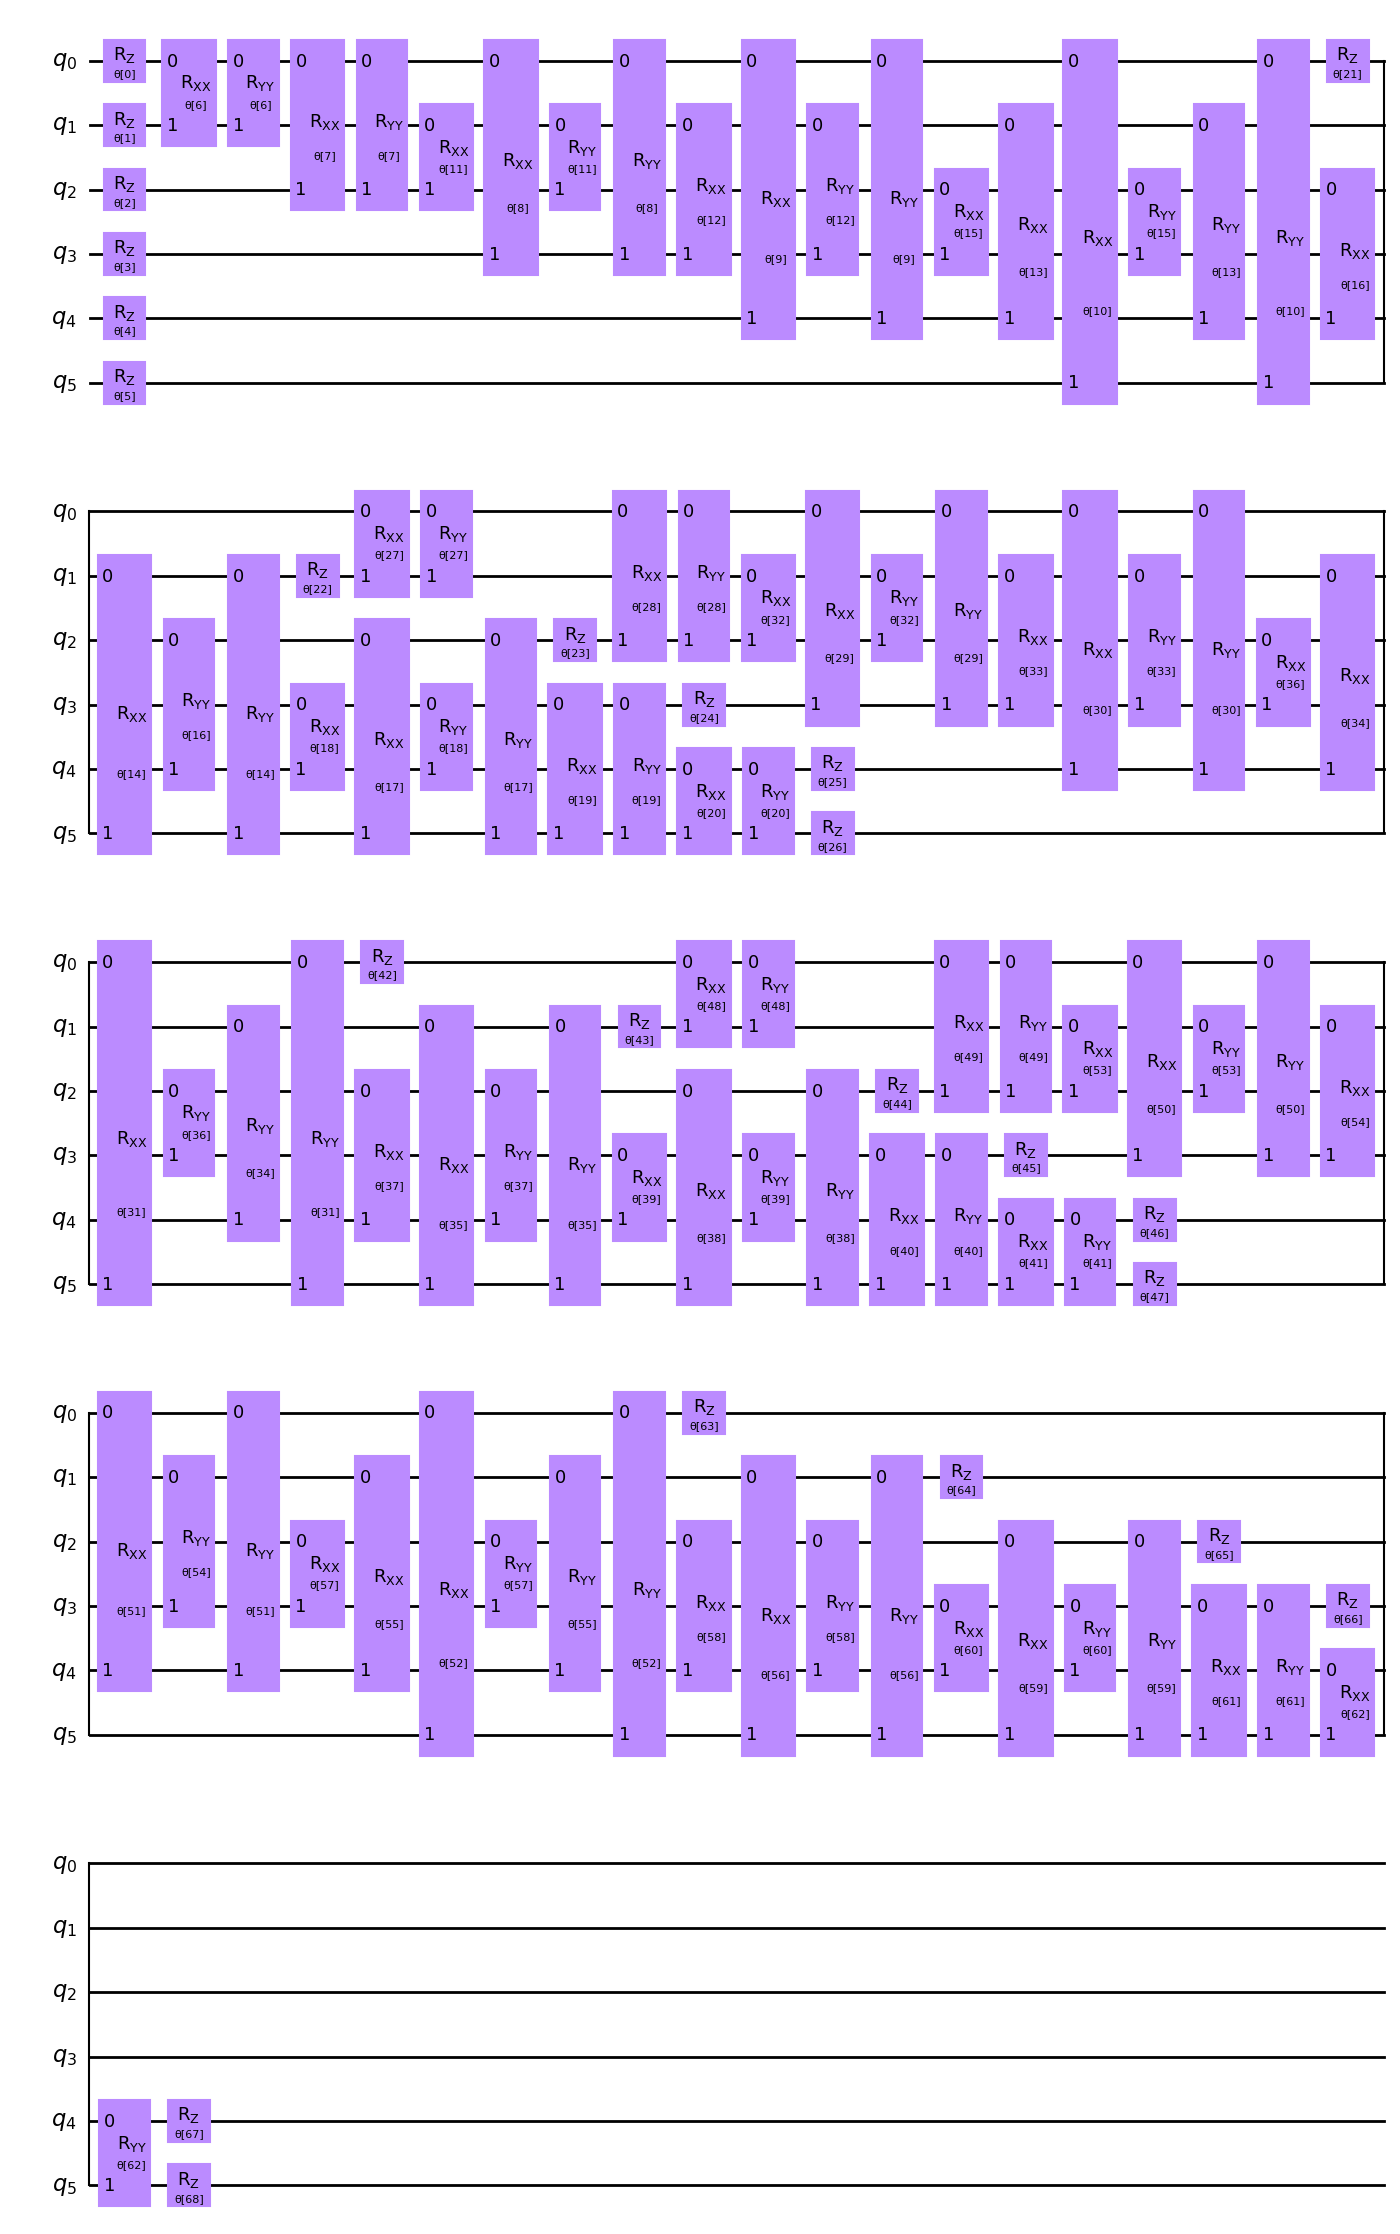

In [103]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

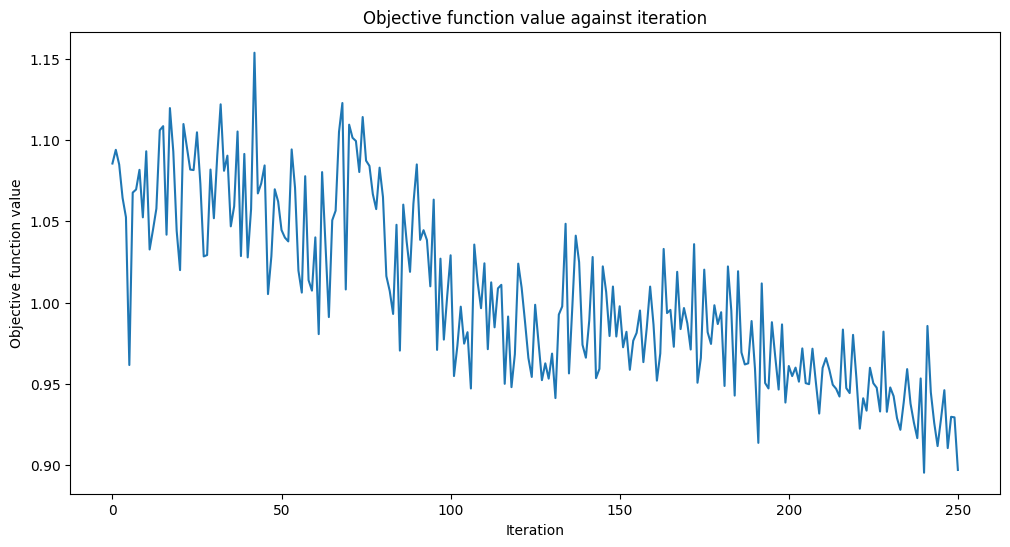

Training time: 965 seconds


In [104]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

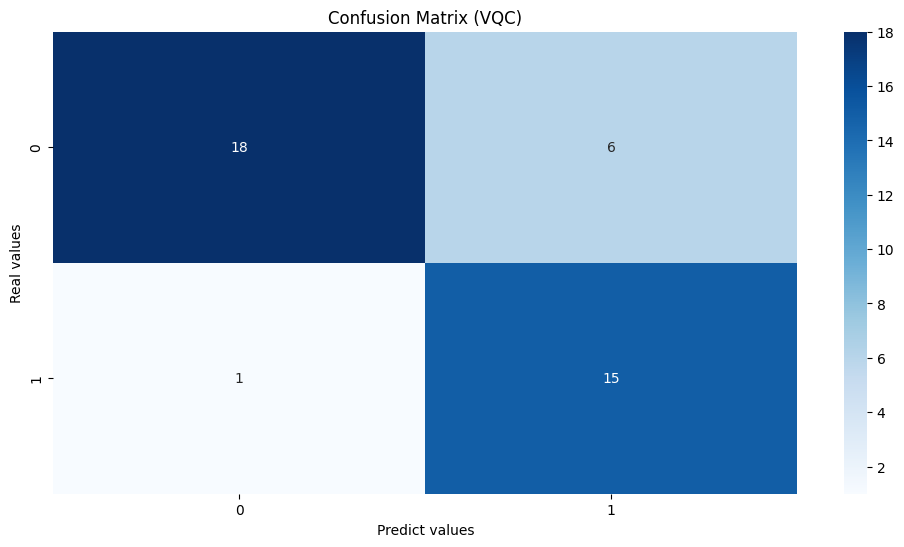

In [105]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [106]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.76
Quantum VQC on the test dataset:     0.82


In [107]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.947368  0.750000  0.837209        24
           1   0.714286  0.937500  0.810811        16

    accuracy                       0.825000        40
   macro avg   0.830827  0.843750  0.824010        40
weighted avg   0.854135  0.825000  0.826650        40



Utilizando Pegasus

In [108]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

In [109]:
import numpy as np
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

In [110]:
# number of qubits is equal to the number of features
num_qubits = len(features.columns)

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000

In [111]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

C:\Users\estre\AppData\Local\Temp\ipykernel_11480\139360568.py:1: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import BasicAer


In [112]:
from qiskit_machine_learning.algorithms import PegasosQSVC
import time
np.random.seed(123)
pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
start = time.time()
pegasos_qsvc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

# testing
pegasos_score = pegasos_qsvc.score(X_test_np, y_test_np)
print(f"PegasosQSVC classification test score: {pegasos_score}")

Training time: 4 seconds
PegasosQSVC classification test score: 0.925


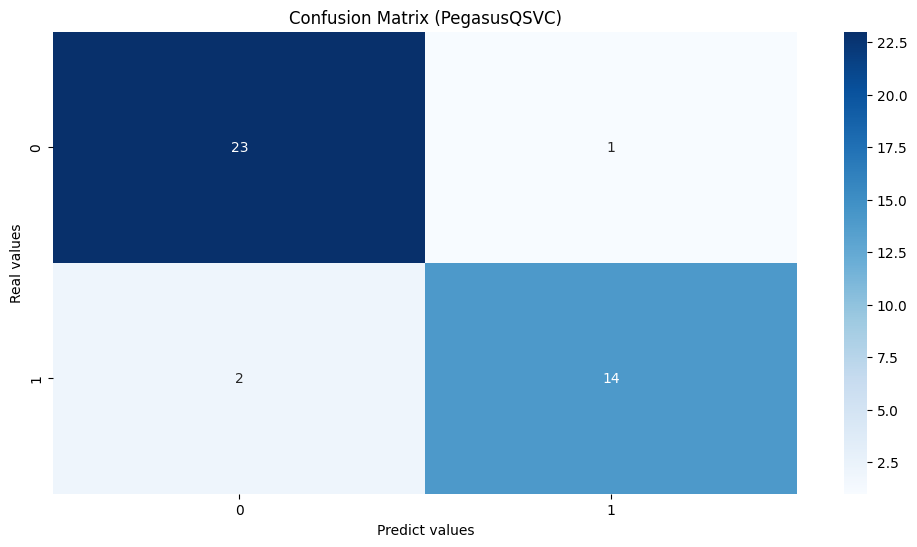

In [113]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.metrics import confusion_matrix
q_predictions = pegasos_qsvc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (PegasusQSVC)")
plot.show()

In [114]:
train_score_q4 = pegasos_qsvc.score(X_train_np, y_train_np)
test_score_q4 = pegasos_qsvc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.80
Quantum VQC on the test dataset:     0.93


In [115]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.920000  0.958333  0.938776        24
           1   0.933333  0.875000  0.903226        16

    accuracy                       0.925000        40
   macro avg   0.926667  0.916667  0.921001        40
weighted avg   0.925333  0.925000  0.924556        40



QSVC

In [116]:
from qiskit_machine_learning.algorithms import QSVC
from sklearn import metrics
import time
# Use QSVC for classification
qsvc = QSVC(quantum_kernel=qkernel)

# Fit the QSVC
start = time.time()
qsvc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

# Predict the labels
labels_test = qsvc.predict(X_test_np)
print(f"Training time: {round(elapsed)} seconds")

# Evalaute the test accuracy
accuracy_test = metrics.balanced_accuracy_score(y_true=y_test_np, y_pred=labels_test)
print(f"accuracy test: {accuracy_test}")

Training time: 33 seconds
accuracy test: 0.9166666666666667


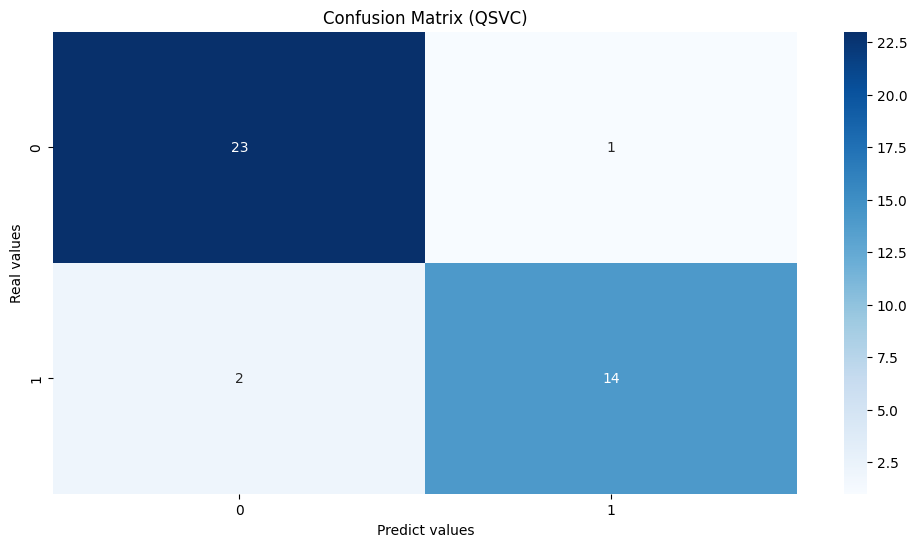

In [117]:
confusion2 = confusion_matrix(y_test_np, labels_test)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (QSVC)")
plot.show()

In [118]:
train_score_q4 = qsvc.score(X_train_np, y_train_np)
test_score_q4 = qsvc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.86
Quantum VQC on the test dataset:     0.93


In [119]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, labels_test, digits=6))

              precision    recall  f1-score   support

           0   0.920000  0.958333  0.938776        24
           1   0.933333  0.875000  0.903226        16

    accuracy                       0.925000        40
   macro avg   0.926667  0.916667  0.921001        40
weighted avg   0.925333  0.925000  0.924556        40

